In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split                                    

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
df = pd.read_csv('data/test.csv')
print("Первые 10 строк столбца Gender:")
print("Оригинальные данные:")
print(train_df['Gender'].head(5).values)
print(df['Gender'].head(5).values)

print("\nТекущие данные (после обработки):")
print(X['Gender'].head(5).values)

print("\nТестовые данные:")
print(test_df['Gender'].head(5).values)

Первые 10 строк столбца Gender:
Оригинальные данные:
['Male' 'Female' 'Female' 'Female' 'Female']
['Male' 'Male' 'Male' 'Female' 'Male']

Текущие данные (после обработки):


NameError: name 'X' is not defined

In [5]:
X = train_df.drop('Exited', axis = 1)
y = train_df['Exited']

print(f"признаки: {X.shape}")
print(f"таргет: {y.shape}")

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
test_df['Gender'] = le.transform(test_df['Gender'])

print(f"Male → {le.transform(['Male'])[0]}")
print(f"Female → {le.transform(['Female'])[0]}")

print(X.head())

признаки: (15000, 13)
таргет: (15000,)
Male → 1
Female → 0
   id  CustomerId     Surname  CreditScore Geography  Gender   Age  Tenure  \
0   0  15653521.0  Nkemakonam        667.0   Germany       1  33.0     3.0   
1   1  15699005.0   Chiekwugo        614.0    France       0  31.0     2.0   
2   2  15656912.0      Chiang        683.0   Germany       0  24.0     6.0   
3   3  15700772.0      Ch'ang        678.0    France       0  38.0     9.0   
4   4  15583850.0      Chiang        588.0     Spain       0  39.0     3.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0  131769.04            1.0        1.0             1.0        162719.69  
1  110615.47            1.0        1.0             1.0        181879.56  
2  115074.02            2.0        1.0             0.0        109688.82  
3       0.00            1.0        1.0             0.0        122823.84  
4       0.00            2.0        1.0             1.0        136910.18  


In [6]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['Geography']

'''
sparse_output=False означает, что результат будет возвращен
в виде обычного массива (а не разреженной матрицы).
drop='first' используется для избежания дамми-ловушки 
(удаляется первый столбец из закодированных данных). 
Это значит, что для N категорий мы получим N-1 столбец.
'''

ohe = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = ohe.fit_transform(X[cat_cols])
test_encoded = ohe.transform(test_df[cat_cols])

encoded_cols = ohe.get_feature_names_out(cat_cols)
X[encoded_cols] = X_encoded
test_df[encoded_cols] = test_encoded

X.drop(cat_cols, axis=1, inplace=True)
test_df.drop(cat_cols, axis=1, inplace=True)


X.head()
test_df.head()

,id,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,15000,15646539.0,Onyemauchechukwu,821.0,1,32.0,3.0,0.00,1.0,1.0,1.0,120893.85,0.0,1.0
1,15001,15628144.0,Chikwado,634.0,1,28.0,1.0,129299.28,1.0,1.0,0.0,179655.85,0.0,0.0
2,15002,15687953.0,Ting,713.0,1,42.0,1.0,0.00,2.0,1.0,1.0,80552.12,0.0,0.0
3,15003,15585067.0,Achebe,611.0,0,38.0,3.0,0.00,1.0,0.0,1.0,151335.24,0.0,0.0
4,15004,15746190.0,Chiazagomekpere,724.0,1,29.0,9.0,0.00,1.0,1.0,1.0,88724.49,0.0,0.0


In [7]:
print("Колонки в X:", X.columns.tolist())
print("Колонки в test_df:", test_df.columns.tolist())

Колонки в X: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
Колонки в test_df: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']


In [8]:
print("Колонки в X, которых нет в test_df:", set(X.columns) - set(test_df.columns))
print("Колонки в test_df, которых нет в X:", set(test_df.columns) - set(X.columns))

Колонки в X, которых нет в test_df: set()
Колонки в test_df, которых нет в X: set()


In [9]:
if 'Geography' in test_df.columns:
    test_df.drop('Geography', axis=1, inplace=True)

In [10]:
test_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [85]:
def create_advanced_features(df, train_stats=None):
    """
    Создает фичи, используя статистики только из тренировочных данных
    
    Parameters:
    df: DataFrame для создания фич
    train_stats: словарь с статистиками из тренировочных данных
                 (если None, вычисляет статистики из df)
    """
    df = df.copy()
    
    # Если переданы статистики из train - используем их
    if train_stats is None:
        # Режим обучения - вычисляем статистики из данных
        balance_max = df['Balance'].max()
        train_stats = {'balance_max': balance_max}
    else:
        # Режим применения - используем переданные статистики
        balance_max = train_stats['balance_max']
    
    # ==================== ФИНАНСОВЫЕ ИНДИКАТОРЫ ====================
    
    # Отношение баланса к зарплате (финансовая стабильность)
    df['Balance_to_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1)
    
    # Кредитный рейтинг на год возраста
    df['CreditScore_per_Age'] = df['CreditScore'] / df['Age']
    
    # Финансовая нагрузка (продукты на баланс)
    df['Products_per_Balance'] = df['NumOfProducts'] / (df['Balance'] + 1)
    
    # ИСПРАВЛЕНО: используем balance_max из тренировочных данных
    df['Financial_Health_Score'] = (
        df['CreditScore'] / 850 + 
        df['Balance'] / balance_max +  # ✅ Используем max из train
        (1 - df['NumOfProducts'] / 4)
    )
    
    # ==================== ДЕМОГРАФИЧЕСКИЕ ГРУППЫ ====================
    
    # Возрастные группы (бинарные)
    df['Is_Young_Client'] = (df['Age'] < 30).astype(int)
    df['Is_Middle_Aged_Client'] = ((df['Age'] >= 30) & (df['Age'] <= 50)).astype(int)
    df['Is_Senior_Client'] = (df['Age'] > 50).astype(int)
    
    # Группы кредитного рейтинга (используем те же бины что и в train)
    df['CreditScore_Group'] = pd.cut(
        df['CreditScore'], 
        bins=[0, 580, 670, 740, 800, 850],
        labels=['Poor', 'Fair', 'Good', 'Very_Good', 'Excellent']
    )
    
    # ==================== ПОВЕДЕНЧЕСКИЕ ПАТТЕРНЫ ====================
    
    # Продукты в год (интенсивность использования)
    df['Products_per_Year'] = df['NumOfProducts'] / (df['Tenure'] + 1)
    
    # ИСПРАВЛЕНО: медиану tenure тоже нужно брать из train
    if 'tenure_median' in train_stats:
        tenure_median = train_stats['tenure_median']
    else:
        tenure_median = df['Tenure'].median()
        train_stats['tenure_median'] = tenure_median
    
    df['Is_Long_Term_Client'] = (df['Tenure'] > tenure_median).astype(int)
    
    # Аналогично для баланса
    if 'balance_median' in train_stats:
        balance_median = train_stats['balance_median']
    else:
        balance_median = df['Balance'].median()
        train_stats['balance_median'] = balance_median
    
    df['Is_Active_High_Balance'] = ((df['IsActiveMember'] == 1) & 
                                   (df['Balance'] > balance_median)).astype(int)
    
    df['Is_Inactive_Low_Balance'] = ((df['IsActiveMember'] == 0) & 
                                    (df['Balance'] < balance_median)).astype(int)
    
    # ==================== ВЗАИМОДЕЙСТВИЯ МЕЖДУ ПРИЗНАКАМИ ====================
    
    df['Age_Balance_Interaction'] = df['Age'] * df['Balance'] / 10000
    df['CreditScore_Products_Interaction'] = df['CreditScore'] * df['NumOfProducts']
    
    # ==================== РИСКОВЫЕ ПРОФИЛИ ====================
    
    df['Risk_Score'] = (
        (df['Age'] < 25).astype(int) +
        (df['NumOfProducts'] > 2).astype(int) +  
        (df['Balance'] < 1000).astype(int) +
        (df['IsActiveMember'] == 0).astype(int)
    )
    
    df['Customer_Value_Score'] = (
        df['Balance'] * 0.4 +
        df['Tenure'] * 1000 * 0.3 +
        df['CreditScore'] * 0.2 +
        df['IsActiveMember'] * 5000 * 0.1
    )
    
    return df, train_stats

# ПРАВИЛЬНОЕ ПРИМЕНЕНИЕ:
print("Создаем фичи для тренировочных данных...")
X_advanced, train_stats = create_advanced_features(X)

print("Создаем фичи для тестовых данных (с использованием статистик из train)...")
test_df_advanced, _ = create_advanced_features(test_df, train_stats)

print(f"Создано {X_advanced.shape[1]} фич в train и {test_df_advanced.shape[1]} в test")

Создаем фичи для тренировочных данных...
Создаем фичи для тестовых данных (с использованием статистик из train)...
Создано 30 фич в train и 30 в test


In [86]:
print("Типы данных в X_advanced:")
print(X_advanced.dtypes)

print("\nТипы данных в test_df_advanced:")
print(test_df_advanced.dtypes)

# Найдем строковые колонки
string_columns = X_advanced.select_dtypes(include=['object']).columns
print(f"\n🔍 Строковые колонки: {list(string_columns)}")

# Посмотрим уникальные значения в этих колонках
for col in string_columns:
    print(f"\n{col}: {X_advanced[col].nunique()} уникальных значений")
    print(f"Примеры: {X_advanced[col].unique()[:5]}")

Типы данных в X_advanced:
id                                     int64
CustomerId                           float64
Surname                               object
CreditScore                          float64
Gender                                 int64
Age                                  float64
Tenure                               float64
Balance                              float64
NumOfProducts                        float64
HasCrCard                            float64
IsActiveMember                       float64
EstimatedSalary                      float64
Geography_Germany                    float64
Geography_Spain                      float64
Balance_to_Salary_Ratio              float64
CreditScore_per_Age                  float64
Products_per_Balance                 float64
Financial_Health_Score               float64
Is_Young_Client                        int64
Is_Middle_Aged_Client                  int64
Is_Senior_Client                       int64
CreditScore_Group            

In [87]:
columns_to_drop = ['id', 'CustomerId', 'Surname'] 

X_advanced_clean = X_advanced.drop(columns=columns_to_drop, errors='ignore')
test_df_advanced_clean = test_df_advanced.drop(columns=columns_to_drop, errors='ignore')

print(f"Колонки после удаления: {X_advanced_clean.columns.tolist()}")

Колонки после удаления: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Balance_to_Salary_Ratio', 'CreditScore_per_Age', 'Products_per_Balance', 'Financial_Health_Score', 'Is_Young_Client', 'Is_Middle_Aged_Client', 'Is_Senior_Client', 'CreditScore_Group', 'Products_per_Year', 'Is_Long_Term_Client', 'Is_Active_High_Balance', 'Is_Inactive_Low_Balance', 'Age_Balance_Interaction', 'CreditScore_Products_Interaction', 'Risk_Score', 'Customer_Value_Score']


In [88]:
remaining_string_cols = X_advanced_clean.select_dtypes(include=['object']).columns
if len(remaining_string_cols) > 0:
    print(f"Остались строковые колонки: {list(remaining_string_cols)}")
    
    from sklearn.preprocessing import LabelEncoder
    
    for col in remaining_string_cols:
        if X_advanced_clean[col].nunique() <= 10:  # Если мало уникальных значений
            # OneHot encoding для колонок с малым числом категорий
            X_advanced_clean = pd.get_dummies(X_advanced_clean, columns=[col], prefix=col)
            test_df_advanced_clean = pd.get_dummies(test_df_advanced_clean, columns=[col], prefix=col)
        else:
            # Label encoding для колонок с большим числом категорий
            le = LabelEncoder()
            X_advanced_clean[col] = le.fit_transform(X_advanced_clean[col].astype(str))
            test_df_advanced_clean[col] = le.transform(test_df_advanced_clean[col].astype(str))

In [89]:
missing_cols_train = set(test_df_advanced_clean.columns) - set(X_advanced_clean.columns)
missing_cols_test = set(X_advanced_clean.columns) - set(test_df_advanced_clean.columns)

print(f"Колонки в test, которых нет в train: {missing_cols_train}")
print(f"Колонки в train, которых нет в test: {missing_cols_test}")

# Добавим отсутствующие колонки (заполним нулями)
for col in missing_cols_test:
    test_df_advanced_clean[col] = 0

for col in missing_cols_train:
    X_advanced_clean[col] = 0

# Упорядочим колонки одинаково
test_df_advanced_clean = test_df_advanced_clean[X_advanced_clean.columns]

print(f"Финализированные размеры:")
print(f"X_advanced_clean: {X_advanced_clean.shape}")
print(f"test_df_advanced_clean: {test_df_advanced_clean.shape}")

Колонки в test, которых нет в train: set()
Колонки в train, которых нет в test: set()
Финализированные размеры:
X_advanced_clean: (15000, 27)
test_df_advanced_clean: (10000, 27)


In [90]:
category_columns = X_advanced_clean.select_dtypes(include=['category']).columns
print(f"Категориальные колонки: {list(category_columns)}")

from sklearn.preprocessing import LabelEncoder

for col in category_columns:
    print(f"Кодируем колонку: {col}")
    print(f"Уникальные значения: {X_advanced_clean[col].unique()}")
    
    le = LabelEncoder()
    X_advanced_clean[col] = le.fit_transform(X_advanced_clean[col].astype(str))
    test_df_advanced_clean[col] = le.transform(test_df_advanced_clean[col].astype(str))

print(f"\nТипы данных после преобразования:")
print(X_advanced_clean.dtypes.value_counts())

Категориальные колонки: ['CreditScore_Group']
Кодируем колонку: CreditScore_Group
Уникальные значения: ['Fair', 'Good', 'Very_Good', 'Poor', 'Excellent']
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very_Good' < 'Excellent']

Типы данных после преобразования:
float64    18
int64       9
Name: count, dtype: int64


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_final = X_advanced_clean
test_final = test_df_advanced_clean

X_train, X_val, y_train, y_val = train_test_split(
    X_final, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"Размеры данных после очистки:")
print(f"Тренировочные: {X_train.shape}")
print(f"Валидационные: {X_val.shape}")

print(f"\nТипы данных в X_train:")
print(X_train.dtypes.value_counts())

rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    class_weight='balanced',
    max_depth=10,
    min_samples_split=5
)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_val)
y_pred_proba = rf.predict_proba(X_val)[:, 1]  

roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"\n ОСНОВНЫЕ МЕТРИКИ:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc:f}")

print("\n Classification Report:")
print(classification_report(y_val, y_pred))

Размеры данных после очистки:
Тренировочные: (12000, 27)
Валидационные: (3000, 27)

Типы данных в X_train:
float64    18
int64       9
Name: count, dtype: int64

 ОСНОВНЫЕ МЕТРИКИ:
Accuracy: 0.8670
ROC-AUC: 0.920314

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      2376
         1.0       0.65      0.76      0.70       624

    accuracy                           0.87      3000
   macro avg       0.79      0.83      0.81      3000
weighted avg       0.88      0.87      0.87      3000



In [ ]:
ПРИМЕНЯЮ МЕТОДЫ ДЛЯ РАСШИРЕННОГО ПРОСТРАНТСВА ФИЧ

In [52]:
!pip install scikit-optimize --quiet

In [93]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

X_final = X_advanced_clean
y_final = y  

print(f"X_final shape: {X_final.shape}")
print(f"y_final length: {len(y_final)}")

param_space = {
    'n_estimators': Integer(100, 2000),
    'max_depth': Integer(3, 12),
    'learning_rate': Real(0.001, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'reg_alpha': Real(0, 2),
    'reg_lambda': Real(0, 2),
    'gamma': Real(0, 1),
    'min_child_weight': Integer(1, 10)
}

# Создаем модель XGBoost
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

bayes_search = BayesSearchCV(
    estimator=xgb,
    search_spaces=param_space,
    n_iter=50,  
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)


print(f"Будет проверено {bayes_search.n_iter} комбинаций параметров")



bayes_search.fit(X_final, y_final)

# Лучшие параметры и результат
print(f"Лучший ROC-AUC: {bayes_search.best_score_:.4f}")
print(f"Лучшие параметры:")
for param, value in bayes_search.best_params_.items():
    print(f"  {param}: {value}")

best_bayes_model = bayes_search.best_estimator_

X_train, X_val, y_train, y_val = train_test_split(
    X_final, 
    y_final, 
    test_size=0.2, 
    random_state=42,
    stratify=y_final
)

y_pred_bayes = best_bayes_model.predict(X_val)
y_pred_proba_bayes = best_bayes_model.predict_proba(X_val)[:, 1]

roc_auc_bayes = roc_auc_score(y_val, y_pred_proba_bayes)
accuracy_bayes = accuracy_score(y_val, y_pred_bayes)

print(f"\nBayesian XGBoost на валидации:")
print(f"ROC-AUC: {roc_auc_bayes:.4f}")
print(f"Accuracy: {accuracy_bayes:.4f}")

# Сравнение с Random Forest
print(f"\n СРАВНЕНИЕ С RANDOM FOREST:")
print(f"Random Forest ROC-AUC: {roc_auc:.4f}")
print(f"Bayesian XGBoost ROC-AUC: {roc_auc_bayes:.4f}")
print(f"Улучшение: {roc_auc_bayes - roc_auc:.4f}")


X_final shape: (15000, 27)
y_final length: 15000
Будет проверено 50 комбинаций параметров
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each 

In [109]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import time

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Обучение и предсказание
start_time = time.time()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
y_pred_proba_xgb = xgb.predict_proba(X_val)[:, 1]
xgb_time = time.time() - start_time

# Метрики
roc_auc_xgb = roc_auc_score(y_val, y_pred_proba_xgb)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)

print(" XGBoost Результаты:")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Время обучения: {xgb_time:.2f} сек")

 XGBoost Результаты:
ROC-AUC: 0.9254
Accuracy: 0.8937
Время обучения: 0.27 сек


In [110]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Создаем мощный ансамбль из разнообразных моделей
models = [
    ('xgb1', xgb.XGBClassifier(
        n_estimators=500, max_depth=7, learning_rate=0.05, 
        subsample=0.8, colsample_bytree=0.8, random_state=42
    )),
    ('xgb2', xgb.XGBClassifier(
        n_estimators=300, max_depth=9, learning_rate=0.1,
        subsample=0.7, colsample_bytree=0.7, random_state=43
    )),
    ('lgbm1', lgb.LGBMClassifier(
        n_estimators=500, max_depth=6, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, random_state=44
    )),
    ('lgbm2', lgb.LGBMClassifier(
        n_estimators=400, max_depth=8, learning_rate=0.08, 
        subsample=0.75, colsample_bytree=0.75, random_state=45
    ))
]

# Создаем стекинг ансамбль
stacking_ensemble = StackingClassifier(
    estimators=models,
    final_estimator=LogisticRegression(C=0.1, random_state=42),
    cv=5,
    passthrough=True
)

print("Обучаем супер-ансамбль...")
stacking_ensemble.fit(X_train, y_train)

# Предсказания
y_pred_stack = stacking_ensemble.predict(X_val)
y_pred_proba_stack = stacking_ensemble.predict_proba(X_val)[:, 1]

roc_auc_stack = roc_auc_score(y_val, y_pred_proba_stack)
accuracy_stack = accuracy_score(y_val, y_pred_stack)

print(f"Стекинг ансамбль:")
print(f"ROC-AUC: {roc_auc_stack:.4f}")
print(f"Accuracy: {accuracy_stack:.4f}")

Обучаем супер-ансамбль...
[LightGBM] [Info] Number of positive: 2494, number of negative: 9506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2671
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207833 -> initscore=-1.338035
[LightGBM] [Info] Start training from score -1.338035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [69]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report

xgb_optimized = XGBClassifier(
    n_estimators=100,  # Увеличиваем количество деревьев
    max_depth=10,        # Увеличиваем глубину
    learning_rate=0.01, # Уменьшаем learning rate для лучшей сходимости
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,      # L1 регуляризация
    reg_lambda=0.1,     # L2 регуляризация
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

print("🎯 Обучаем оптимизированный XGBoost...")
xgb_optimized.fit(X_train, y_train)

# Предсказания
y_pred_opt = xgb_optimized.predict(X_val)
y_pred_proba_opt = xgb_optimized.predict_proba(X_val)[:, 1]

# Метрики
roc_auc_opt = roc_auc_score(y_val, y_pred_proba_opt)
accuracy_opt = accuracy_score(y_val, y_pred_opt)

print(f"🎯 Оптимизированный XGBoost:")
print(f"ROC-AUC: {roc_auc_opt:.4f}")
print(f"Accuracy: {accuracy_opt:.4f}")

🎯 Обучаем оптимизированный XGBoost...
🎯 Оптимизированный XGBoost:
ROC-AUC: 0.9191
Accuracy: 0.8807


In [33]:
def create_elite_features(df):
    """
    Создаем элитные фичи на основе анализа важности
    """
    df = df.copy()
    
    # Усиливаем топ-5 самых важных фич
    # Взаимодействия самых сильных фич
    df['Balance_CreditScore_Super'] = df['Balance'] * df['CreditScore'] / 1000
    df['Age_Balance_Power'] = (df['Age'] ** 1.5) * (df['Balance'] ** 0.5)
    
    # Нелинейные преобразования топ-фич
    df['CreditScore_Quantile'] = pd.qcut(df['CreditScore'], q=10, labels=False, duplicates='drop')
    df['Balance_Log_Interaction'] = np.log1p(df['Balance']) * df['NumOfProducts']
    
    # Комбинации 3-х самых важных фич
    df['Elite_Financial_Score'] = (
        df['CreditScore'] * 0.5 + 
        df['Balance'] * 0.3 + 
        df['Age'] * 0.2
    )
    
    # Сезонные/временные паттерны (если есть временные данные)
    if 'Tenure' in df.columns:
        df['Tenure_Squared'] = df['Tenure'] ** 2
        df['Balance_per_Tenure_Squared'] = df['Balance'] / (df['Tenure'] ** 2 + 1)
    
    # Экстремальные значения
    df['Is_CreditScore_Extreme'] = ((df['CreditScore'] > 800) | (df['CreditScore'] < 500)).astype(int)
    df['Is_Balance_Extreme'] = ((df['Balance'] > 150000) | (df['Balance'] < 100)).astype(int)
    
    return df

# Применяем элитные фичи
X_elite = create_elite_features(X_advanced_clean)
test_elite = create_elite_features(test_df_advanced_clean)

print(f"🎯 Элитные фичи созданы: {X_elite.shape[1]} колонок")

🎯 Элитные фичи созданы: 36 колонок


In [71]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Параметры для поиска
param_distributions = {
    'n_estimators': stats.randint(50,300),
    'max_depth': stats.randint(3,25),
    'learning_rate': stats.uniform(0.01, 0.3),
    'subsample': stats.uniform(0.6, 0.4),
    'colsample_bytree': stats.uniform(0.6, 0.4),
    'reg_alpha': stats.uniform(0, 1),
    'reg_lambda': stats.uniform(0, 1)
}

# Создаем базовую модель
xgb_base = XGBClassifier(random_state=42, eval_metric='logloss')

# Randomized Search
random_search = RandomizedSearchCV(
    xgb_base,
    param_distributions,
    n_iter=50,  # Количество комбинаций для проверки
    cv=3,       # 3-fold cross-validation
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,  # Используем все ядра
    verbose=1
)

print("🎯 Запускаем автоматический подбор параметров...")
random_search.fit(X_train, y_train)

# Лучшие параметры
print(f"🎯 Лучшие параметры: {random_search.best_params_}")
print(f"🎯 Лучший ROC-AUC: {random_search.best_score_:.4f}")

# Используем лучшую модель
best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_val)
y_pred_proba_best = best_xgb.predict_proba(X_val)[:, 1]

roc_auc_best = roc_auc_score(y_val, y_pred_proba_best)
accuracy_best = accuracy_score(y_val, y_pred_best)

print(f"🎯 Лучшая модель после подбора параметров:")
print(f"ROC-AUC: {roc_auc_best:.5f}")
print(f"Accuracy: {accuracy_best:.4f}")

🎯 Запускаем автоматический подбор параметров...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
🎯 Лучшие параметры: {'colsample_bytree': np.float64(0.7177795568278342), 'learning_rate': np.float64(0.1255293185805776), 'max_depth': 3, 'n_estimators': 116, 'reg_alpha': np.float64(0.1694927466860925), 'reg_lambda': np.float64(0.5568012624583502), 'subsample': np.float64(0.9744619096643123)}
🎯 Лучший ROC-AUC: 0.9273
🎯 Лучшая модель после подбора параметров:
ROC-AUC: 0.92663
Accuracy: 0.8937


In [60]:
# Загружаем исходный тестовый файл для получения ID
test_original = pd.read_csv('data/test.csv')  # укажите правильный путь к файлу
test_ids = test_original['id']

print(f"✅ Загружены ID из исходного файла: {len(test_ids)} записей")

# Создаем финальную модель с лучшими параметрами
final_model = XGBClassifier(
    colsample_bytree=0.5438690071815024,
    gamma=0.32051609379143403,
    learning_rate=0.00560934847477771,
    max_depth=3,
    min_child_weight=6,
    n_estimators=1984,
    reg_alpha=0.27341575146016034,
    reg_lambda=1.3719835883172633,
    subsample=0.805012178084324,
    random_state=42,
    eval_metric='logloss'
)


print("🎯 Обучаем финальную модель на всех данных...")
final_model.fit(X_final, y_final)

print("📊 Создаем предсказания для тестовых данных...")
test_predictions_final = final_model.predict_proba(test_df_advanced_clean)[:, 1]
test_predictions_final = np.clip(test_predictions_final, 0.001, 0.999)

# Создаем сабмишн с правильными ID
submission_final = pd.DataFrame({
    'id': test_ids,
    'Exited': test_predictions_final
})

print(f"📊 Размер финального сабмишна: {submission_final.shape}")
print("🔍 Первые 5 строк сабмишна:")
print(submission_final.head())

# Сохраняем сабмишн
submission_final.to_csv('submission_final_bayesian_xgb.csv', index=False)
print("✅ submission_final_bayesian_xgb.csv создан")

# Также создаем блендинг с Random Forest, если нужно
try:
    test_predictions_rf = rf_model.predict_proba(test_df_advanced_clean)[:, 1]
    test_predictions_blend = (test_predictions_final * 0.7 + test_predictions_rf * 0.3)
    test_predictions_blend = np.clip(test_predictions_blend, 0.001, 0.999)
    
    submission_blend = pd.DataFrame({
        'id': test_ids,
        'Exited': test_predictions_blend
    })
    
    submission_blend.to_csv('submission_final_blend.csv', index=False)
    print("✅ submission_final_blend.csv создан")
    
except NameError:
    print("⚠️ Random Forest модель не найдена, создаем только XGBoost сабмишн")

# Проверяем распределение предсказаний
print(f"\n📈 СТАТИСТИКА ПРЕДСКАЗАНИЙ:")
print(f"Min: {test_predictions_final.min():.4f}")
print(f"Max: {test_predictions_final.max():.4f}")
print(f"Mean: {test_predictions_final.mean():.4f}")
print(f"Std: {test_predictions_final.std():.4f}")

# Проверяем, что все ID корректны
print(f"\n🔍 ПРОВЕРКА САБМИШНА:")
print(f"Уникальных ID: {submission_final['id'].nunique()}")
print(f"Пропущенных значений: {submission_final.isnull().sum().sum()}")

print(f"\n🎉 ФИНАЛЬНЫЙ САБМИШН ГОТОВ!")
print("📊 Рекомендую загрузить на Kaggle:")
print("   - submission_final_bayesian_xgb.csv (основной)")
if 'submission_blend' in locals():
    print("   - submission_final_blend.csv (блендинг с RF)")

✅ Загружены ID из исходного файла: 10000 записей
🎯 Обучаем финальную модель на всех данных...
📊 Создаем предсказания для тестовых данных...
📊 Размер финального сабмишна: (10000, 2)
🔍 Первые 5 строк сабмишна:
      id    Exited
0  15000  0.081349
1  15001  0.054874
2  15002  0.018649
3  15003  0.272466
4  15004  0.051136
✅ submission_final_bayesian_xgb.csv создан
⚠️ Random Forest модель не найдена, создаем только XGBoost сабмишн

📈 СТАТИСТИКА ПРЕДСКАЗАНИЙ:
Min: 0.0026
Max: 0.9936
Mean: 0.2007
Std: 0.2850

🔍 ПРОВЕРКА САБМИШНА:
Уникальных ID: 10000
Пропущенных значений: 0

🎉 ФИНАЛЬНЫЙ САБМИШН ГОТОВ!
📊 Рекомендую загрузить на Kaggle:
   - submission_final_bayesian_xgb.csv (основной)


In [61]:
# Дополнительная проверка стабильности модели
from sklearn.model_selection import cross_val_score

print("\n🔬 Проверяем стабильность модели на кросс-валидации...")
cv_scores = cross_val_score(final_model, X_final, y_final, 
                           cv=100, scoring='roc_auc', n_jobs=-1)

print(f"ROC-AUC на 5-фолд CV: {cv_scores}")
print(f"Средний ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

if cv_scores.mean() > 0.92:
    print("🚀 Отличная стабильность модели!")
elif cv_scores.mean() > 0.90:
    print("✅ Хорошая стабильность модели!")
else:
    print("⚠️ Внимание: возможна нестабильность модели")


🔬 Проверяем стабильность модели на кросс-валидации...
ROC-AUC на 5-фолд CV: [0.92708051 0.94334508 0.91759284 0.97424776 0.95716996 0.95066414
 0.94659799 0.89807536 0.96503117 0.97533207 0.93819463 0.89807536
 0.971537   0.86988344 0.95608566 0.95879642 0.92897804 0.94361616
 0.86635945 0.92843589 0.94117647 0.93792356 0.8953646  0.91054486
 0.94795337 0.92897804 0.96665763 0.90837625 0.90729195 0.94985091
 0.94686907 0.93087558 0.93548387 0.94930876 0.9259962  0.94659799
 0.88940092 0.92165899 0.9295202  0.94063432 0.91894822 0.8782868
 0.97560314 0.84602873 0.88289509 0.93439957 0.91949038 0.93548387
 0.95527243 0.91894822 0.87910003 0.95229059 0.93358634 0.92165899
 0.90729195 0.91488208 0.91325562 0.93412849 0.93439957 0.91135809
 0.94280293 0.93304419 0.94442938 0.90729195 0.96150718 0.90349688
 0.92138791 0.92924912 0.94714015 0.92545405 0.93548387 0.93385741
 0.94036324 0.9590675  0.93982109 0.93087558 0.92816481 0.92165899
 0.96936839 0.9192193  0.97587422 0.88614801 0.932997

In [83]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import numpy as np

# Узкие диапазоны вокруг лучших параметров
refined_param_space = {
    'n_estimators': Integer(1900, 2100),  # ±100 вокруг 1984
    'max_depth': Integer(3, 5),           # 3-5 (лучший был 3)
    'learning_rate': Real(0.004, 0.007),  # узкий диапазон вокруг 0.0056
    'subsample': Real(0.78, 0.83),        # ±0.025 вокруг 0.805
    'colsample_bytree': Real(0.52, 0.57), # ±0.015 вокруг 0.544
    'reg_alpha': Real(0.25, 0.30),        # ±0.025 вокруг 0.273
    'reg_lambda': Real(1.3, 1.45),        # ±0.05 вокруг 1.372
    'gamma': Real(0.30, 0.35),            # ±0.02 вокруг 0.321
    'min_child_weight': Integer(5, 7)     # 5-7 (лучший был 6)
}

# Создаем модель XGBoost
xgb_refined = XGBClassifier(random_state=42, eval_metric='logloss')

# Настраиваем Bayesian Search с увеличенным CV
bayes_search_refined = BayesSearchCV(
    estimator=xgb_refined,
    search_spaces=refined_param_space,
    n_iter=80,  # Увеличиваем количество итераций
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),  # 10 фолдов!
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("🎯 Запускаем ТОЧНУЮ Bayesian Optimization...")
print(f"Будет проверено {bayes_search_refined.n_iter} комбинаций параметров")
print("Используем 10-фолдовую CV для большей точности")
print("Это может занять некоторое время...")

# Запускаем поиск на ВСЕХ данных
bayes_search_refined.fit(X_final, y_final)

# Лучшие параметры и результат
print(f"\n🎉 ТОЧНЫЙ ПОИСК ЗАВЕРШЕН!")
print(f"Лучший ROC-AUC: {bayes_search_refined.best_score_:.4f}")
print(f"Лучшие параметры:")
for param, value in bayes_search_refined.best_params_.items():
    print(f"  {param}: {value}")

# Сохраняем лучшую модель
best_refined_model = bayes_search_refined.best_estimator_

# Проверим на валидационных данных
X_train, X_val, y_train, y_val = train_test_split(
    X_final, 
    y_final, 
    test_size=0.2, 
    random_state=42,
    stratify=y_final
)

# Предсказания refined модели
y_pred_refined = best_refined_model.predict(X_val)
y_pred_proba_refined = best_refined_model.predict_proba(X_val)[:, 1]

roc_auc_refined = roc_auc_score(y_val, y_pred_proba_refined)
accuracy_refined = accuracy_score(y_val, y_pred_refined)

print(f"\n🔥 Refined XGBoost на валидации:")
print(f"ROC-AUC: {roc_auc_refined:.4f}")
print(f"Accuracy: {accuracy_refined:.4f}")

# Сравнение с предыдущей лучшей моделью
print(f"\n📊 СРАВНЕНИЕ С ПРЕДЫДУЩЕЙ МОДЕЛЬЮ:")
print(f"Предыдущий ROC-AUC: {roc_auc_bayes:.4f}")
print(f"Refined ROC-AUC: {roc_auc_refined:.4f}")
print(f"Улучшение: {roc_auc_refined - roc_auc_bayes:.4f}")

# Создаем финальный сабмишн с refined моделью
print("\n🎯 Создаем финальный сабмишн...")

test_predictions_refined = best_refined_model.predict_proba(test_df_advanced_clean)[:, 1]
test_predictions_refined = np.clip(test_predictions_refined, 0.001, 0.999)

submission_refined = pd.DataFrame({
    'id': range(15000, 15000 + len(test_predictions_refined)),
    'Exited': test_predictions_refined
})

submission_refined.to_csv('submission_refined_xgb.csv', index=False)
print("✅ submission_refined_xgb.csv создан")

# Анализ улучшения
improvement = roc_auc_refined - roc_auc_bayes
if improvement > 0.005:
    print(f"\n🚀 ОТЛИЧНОЕ УЛУЧШЕНИЕ: +{improvement:.4f} ROC-AUC!")
elif improvement > 0:
    print(f"\n✅ Небольшое улучшение: +{improvement:.4f} ROC-AUC")
else:
    print(f"\n⚠️  Ухудшение: {improvement:.4f} ROC-AUC")

# Дополнительная проверка стабильности
print(f"\n🔬 ПРОВЕРКА СТАБИЛЬНОСТИ (10-фолд CV):")
cv_scores_refined = cross_val_score(best_refined_model, X_final, y_final, 
                                  cv=10, scoring='roc_auc', n_jobs=-1)

print(f"ROC-AUC на 10-фолд CV: {cv_scores_refined}")
print(f"Средний ROC-AUC: {cv_scores_refined.mean():.4f} (+/- {cv_scores_refined.std() * 2:.4f})")

if cv_scores_refined.mean() >= 0.939:
    print("🎯 ЦЕЛЬ ДОСТИГНУТА! ROC-AUC >= 0.939")
else:
    print("📈 Цель пока не достигнута, но мы близки!")

🎯 Запускаем ТОЧНУЮ Bayesian Optimization...
Будет проверено 80 комбинаций параметров
Используем 10-фолдовую CV для большей точности
Это может занять некоторое время...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidat

In [92]:
# Переопределяем X_final и test_df с элитными фичами
X_final_elite = X_elite
test_df_elite = test_elite

print(f"✅ X_final_elite shape: {X_final_elite.shape}")
print(f"✅ test_df_elite shape: {test_df_elite.shape}")

# Используем то же пространство параметров, что и в refined поиске
elite_param_space = {
    'n_estimators': Integer(1900, 2100),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.004, 0.007),
    'subsample': Real(0.78, 0.83),
    'colsample_bytree': Real(0.52, 0.57),
    'reg_alpha': Real(0.25, 0.30),
    'reg_lambda': Real(1.3, 1.45),
    'gamma': Real(0.30, 0.35),
    'min_child_weight': Integer(5, 7)
}

# Создаем модель XGBoost
xgb_elite = XGBClassifier(random_state=42, eval_metric='logloss')

# Настраиваем Bayesian Search
bayes_search_elite = BayesSearchCV(
    estimator=xgb_elite,
    search_spaces=elite_param_space,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("🎯 Запускаем Bayesian Optimization на элитных фичах...")
print(f"Будет проверено {bayes_search_elite.n_iter} комбинаций параметров")
print("Это может занять несколько минут...")

# Запускаем поиск на элитных фичах
bayes_search_elite.fit(X_final_elite, y_final)

# Лучшие параметры и результат
print(f"\n🎉 ПОИСК НА ЭЛИТНЫХ ФИЧАХ ЗАВЕРШЕН!")
print(f"Лучший ROC-AUC: {bayes_search_elite.best_score_:.4f}")
print(f"Лучшие параметры:")
for param, value in bayes_search_elite.best_params_.items():
    print(f"  {param}: {value}")

# Сохраняем лучшую модель
best_elite_model = bayes_search_elite.best_estimator_

# Проверим на валидационных данных
X_train_elite, X_val_elite, y_train_elite, y_val_elite = train_test_split(
    X_final_elite, 
    y_final, 
    test_size=0.2, 
    random_state=42,
    stratify=y_final
)

# Предсказания elite модели
y_pred_elite = best_elite_model.predict(X_val_elite)
y_pred_proba_elite = best_elite_model.predict_proba(X_val_elite)[:, 1]

roc_auc_elite = roc_auc_score(y_val_elite, y_pred_proba_elite)
accuracy_elite = accuracy_score(y_val_elite, y_pred_elite)

print(f"\n🔥 Elite XGBoost на валидации:")
print(f"ROC-AUC: {roc_auc_elite:.4f}")
print(f"Accuracy: {accuracy_elite:.4f}")

# Сравнение с предыдущей лучшей моделью
print(f"\n📊 СРАВНЕНИЕ С ПРЕДЫДУЩЕЙ ЛУЧШЕЙ МОДЕЛЬЮ:")
print(f"Предыдущий лучший ROC-AUC: {roc_auc_refined:.4f}")
print(f"Elite модель ROC-AUC: {roc_auc_elite:.4f}")
print(f"Улучшение: {roc_auc_elite - roc_auc_refined:.4f}")

# Создаем сабмишн с elite моделью
print("\n🎯 Создаем сабмишн с элитными фичами...")

test_predictions_elite = best_elite_model.predict_proba(test_df_elite)[:, 1]
test_predictions_elite = np.clip(test_predictions_elite, 0.001, 0.999)

submission_elite = pd.DataFrame({
    'id': range(15000, 15000 + len(test_predictions_elite)),
    'Exited': test_predictions_elite
})

submission_elite.to_csv('submission_elite_features.csv', index=False)
print("✅ submission_elite_features.csv создан")

✅ X_final_elite shape: (15000, 36)
✅ test_df_elite shape: (10000, 36)
🎯 Запускаем Bayesian Optimization на элитных фичах...
Будет проверено 50 комбинаций параметров
Это может занять несколько минут...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 ca

In [94]:
import warnings
warnings.filterwarnings('ignore')

# 1. УЛУЧШЕННЫЕ ЭЛИТНЫЕ ФИЧИ
def create_super_elite_features(df):
    """
    Создаем супер-элитные фичи с нелинейными преобразованиями
    """
    df = df.copy()
    
    # Сильные нелинейные преобразования
    df['CreditScore_Cube'] = df['CreditScore'] ** 3 / 1000000
    df['Balance_Sqrt_Age'] = np.sqrt(df['Balance'] + 1) * df['Age']
    df['Age_Exp_Interaction'] = np.exp(df['Age'] * 0.01) * df['CreditScore']
    
    # Полиномиальные взаимодействия топ-3 фич
    df['Poly_Financial_Score'] = (
        (df['CreditScore'] ** 2) * 0.3 +
        (df['Balance'] ** 1.5) * 0.4 +
        (df['Age'] ** 2.5) * 0.3
    ) / 10000
    
    # Взаимодействия 4-го порядка
    df['Mega_Interaction'] = (
        df['CreditScore'] * df['Balance'] * df['Age'] * df['NumOfProducts']
    ) / 10000000
    
    # Логарифмические преобразования с взаимодействиями
    df['Log_Balance_Credit_Age'] = (
        np.log1p(df['Balance']) * 
        np.log1p(df['CreditScore']) * 
        df['Age']
    ) / 1000
    
    # Квантильные взаимодействия
    df['Balance_Quantile'] = pd.qcut(df['Balance'], q=20, labels=False, duplicates='drop')
    df['CreditScore_Quantile_Fine'] = pd.qcut(df['CreditScore'], q=15, labels=False, duplicates='drop')
    
    # Сложные комбинации географических и демографических данных
    if 'Geography_Germany' in df.columns:
        df['Germany_High_Balance'] = df['Geography_Germany'] * (df['Balance'] > 100000)
        df['Spain_Young_Active'] = df['Geography_Spain'] * (df['Age'] < 35) * df['IsActiveMember']
    
    # Временные тренды (если Tenure доступен)
    if 'Tenure' in df.columns:
        df['Tenure_Balance_Ratio'] = df['Balance'] / (df['Tenure'] + 1)
        df['Tenure_Age_Product'] = df['Tenure'] * df['Age'] * df['NumOfProducts']
    
    # Экстремальные бинарные фичи
    df['Is_Very_High_Credit'] = (df['CreditScore'] > 750).astype(int)
    df['Is_Very_Low_Balance'] = (df['Balance'] < 50).astype(int)
    df['Is_Senior_High_Balance'] = ((df['Age'] > 60) & (df['Balance'] > 100000)).astype(int)
    
    return df

print("🎯 Создаем СУПЕР-ЭЛИТНЫЕ фичи...")
X_super_elite = create_super_elite_features(X_advanced_clean)
test_super_elite = create_super_elite_features(test_df_advanced_clean)

print(f"✅ Супер-элитные фичи созданы: {X_super_elite.shape[1]} колонок")

🎯 Создаем СУПЕР-ЭЛИТНЫЕ фичи...
✅ Супер-элитные фичи созданы: 42 колонок


In [95]:
# 2. ЭКСТРЕМАЛЬНАЯ OPTIMIZATION С УЗКИМИ ДИАПАЗОНАМИ
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import numpy as np

# СУПЕР-УЗКИЕ диапазоны вокруг лучших параметров
extreme_param_space = {
    'n_estimators': Integer(2050, 2200),
    'max_depth': Integer(3, 4),
    'learning_rate': Real(0.006, 0.008),
    'subsample': Real(0.82, 0.85),
    'colsample_bytree': Real(0.51, 0.53),
    'reg_alpha': Real(0.24, 0.26),
    'reg_lambda': Real(1.35, 1.38),
    'gamma': Real(0.34, 0.36),
    'min_child_weight': Integer(5, 6),
    'scale_pos_weight': Real(0.9, 1.1)
}

# Создаем модель для экстремальной оптимизации
xgb_extreme = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Bayesian Search с увеличенным количеством фолдов
bayes_search_extreme = BayesSearchCV(
    estimator=xgb_extreme,
    search_spaces=extreme_param_space,
    n_iter=80,  # Больше итераций в узком диапазоне
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),  # 10 фолдов
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\n🎯 Запускаем ЭКСТРЕМАЛЬНЫЙ Bayesian Optimization...")
print("Используем супер-элитные фичи и 10-фолдовую CV")
print("Это может занять время...")

# Запускаем поиск
bayes_search_extreme.fit(X_super_elite, y_final)

print(f"\n🎉 ЭКСТРЕМАЛЬНЫЙ ПОИСК ЗАВЕРШЕН!")
print(f"Лучший ROC-AUC: {bayes_search_extreme.best_score_:.4f}")
print("Лучшие параметры:")
for param, value in bayes_search_extreme.best_params_.items():
    print(f"  {param}: {value}")

best_extreme_model = bayes_search_extreme.best_estimator_


🎯 Запускаем ЭКСТРЕМАЛЬНЫЙ Bayesian Optimization...
Используем супер-элитные фичи и 10-фолдовую CV
Это может занять время...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:22] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:32] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:44] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:37:55] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:08] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:23] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:35] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:38:47] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:00] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:11] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:22] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:35] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:39:47] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:01] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:12] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:25] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:37] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:40:48] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:00] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:10] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:20] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:31] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:41] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:41:53] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:06] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:17] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:29] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:41] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:42:53] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:03] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:13] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:26] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:36] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:48] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:43:59] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:09] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:19] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:28] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:39] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:49] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:44:59] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:09] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:20] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:33] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:46] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:45:58] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:11] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:26] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:37] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:46:51] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:02] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:15] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:28] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:43] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:47:54] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:07] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:21] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:33] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:48:46] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:00] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:15] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:29] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:41] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:49:55] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:07] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:27] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:50:50] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:05] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:21] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:35] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:51:48] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:02] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:20] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:39] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:52:55] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:08] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:23] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:37] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:53:50] WARN

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:54:05] WARN


🎉 ЭКСТРЕМАЛЬНЫЙ ПОИСК ЗАВЕРШЕН!
Лучший ROC-AUC: 0.9303
Лучшие параметры:
  colsample_bytree: 0.5117444857924075
  gamma: 0.3482557867768453
  learning_rate: 0.006
  max_depth: 3
  min_child_weight: 5
  n_estimators: 2050
  reg_alpha: 0.24182044438461497
  reg_lambda: 1.370496433488063
  scale_pos_weight: 0.9261068484405822
  subsample: 0.82


In [96]:
# 3. ДОБАВЛЯЕМ LIGHTGBM В АНСАМБЛЬ
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# Оптимизация LightGBM
lgbm_params = {
    'n_estimators': 1500,
    'max_depth': -1,
    'learning_rate': 0.01,
    'num_leaves': 31,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 42
}

lgbm_model = LGBMClassifier(**lgbm_params)

print("\n Обучаем LightGBM...")
lgbm_model.fit(X_super_elite, y_final)

# Проверяем LightGBM на валидации
X_train_se, X_val_se, y_train_se, y_val_se = train_test_split(
    X_super_elite, y_final, test_size=0.2, random_state=42, stratify=y_final
)

lgbm_val_pred = lgbm_model.predict_proba(X_val_se)[:, 1]
lgbm_roc_auc = roc_auc_score(y_val_se, lgbm_val_pred)
print(f"LightGBM ROC-AUC: {lgbm_roc_auc:.4f}")


 Обучаем LightGBM...
[LightGBM] [Info] Number of positive: 3118, number of negative: 11882
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4740
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207867 -> initscore=-1.337833
[LightGBM] [Info] Start training from score -1.337833
LightGBM ROC-AUC: 0.9820


In [100]:
print("🔄 Исправляем несоответствие фичей...")

# Пересоздаем правильные фичи для каждой модели
print("Создаем элитные фичи для elite_model...")
X_elite_correct = create_elite_features(X_advanced_clean)
test_elite_correct = create_elite_features(test_df_advanced_clean)

print("Создаем супер-элитные фичи для extreme_model и LightGBM...")
X_super_elite_correct = create_super_elite_features(X_advanced_clean)
test_super_elite_correct = create_super_elite_features(test_df_advanced_clean)

print(f"✅ Elite фичи: {X_elite_correct.shape[1]} колонок")
print(f"✅ Super Elite фичи: {X_super_elite_correct.shape[1]} колонок")

# Переобучаем elite_model на правильных фичах (быстро, так как параметры уже известны)
print("\n🎯 Переобучаем elite_model на правильных фичах...")
best_elite_model_correct = XGBClassifier(
    colsample_bytree=0.52,
    gamma=0.35,
    learning_rate=0.007,
    max_depth=3,
    min_child_weight=5,
    n_estimators=2100,
    reg_alpha=0.25,
    reg_lambda=1.3639195910873667,
    subsample=0.83,
    random_state=42,
    eval_metric='logloss'
)
best_elite_model_correct.fit(X_elite_correct, y_final)

# Проверяем elite_model на валидации
X_train_elite, X_val_elite, y_train_elite, y_val_elite = train_test_split(
    X_elite_correct, y_final, test_size=0.2, random_state=42, stratify=y_final
)

elite_val_pred = best_elite_model_correct.predict_proba(X_val_elite)[:, 1]
elite_roc_auc = roc_auc_score(y_val_elite, elite_val_pred)
print(f"✅ Elite model ROC-AUC: {elite_roc_auc:.4f}")

🔄 Исправляем несоответствие фичей...
Создаем элитные фичи для elite_model...
Создаем супер-элитные фичи для extreme_model и LightGBM...
✅ Elite фичи: 36 колонок
✅ Super Elite фичи: 42 колонок

🎯 Переобучаем elite_model на правильных фичах...
✅ Elite model ROC-AUC: 0.9396


In [101]:
print("\n🚀 Создаем сабмишны с правильными фичами...")

# 1. LightGBM на супер-элитных фичах (наш чемпион)
test_predictions_lgbm = lgbm_model.predict_proba(test_super_elite_correct)[:, 1]
test_predictions_lgbm = np.clip(test_predictions_lgbm, 0.001, 0.999)

submission_lgbm = pd.DataFrame({
    'id': range(15000, 15000 + len(test_predictions_lgbm)),
    'Exited': test_predictions_lgbm
})
submission_lgbm.to_csv('submission_lgbm_champion.csv', index=False)
print("✅ submission_lgbm_champion.csv создан")

# 2. Extreme XGBoost на супер-элитных фичах
test_predictions_extreme = best_extreme_model.predict_proba(test_super_elite_correct)[:, 1]
test_predictions_extreme = np.clip(test_predictions_extreme, 0.001, 0.999)

submission_extreme = pd.DataFrame({
    'id': range(15000, 15000 + len(test_predictions_extreme)),
    'Exited': test_predictions_extreme
})
submission_extreme.to_csv('submission_extreme_xgb.csv', index=False)
print("✅ submission_extreme_xgb.csv создан")

# 3. Elite XGBoost на элитных фичах
test_predictions_elite = best_elite_model_correct.predict_proba(test_elite_correct)[:, 1]
test_predictions_elite = np.clip(test_predictions_elite, 0.001, 0.999)

submission_elite = pd.DataFrame({
    'id': range(15000, 15000 + len(test_predictions_elite)),
    'Exited': test_predictions_elite
})
submission_elite.to_csv('submission_elite_xgb.csv', index=False)
print("✅ submission_elite_xgb.csv создан")


🚀 Создаем сабмишны с правильными фичами...
✅ submission_lgbm_champion.csv создан
✅ submission_extreme_xgb.csv создан
✅ submission_elite_xgb.csv создан


In [102]:
print("\n🎯 Создаем ансамбли на одинаковых наборах фичей...")

# Ансамбль 1: Только модели на супер-элитных фичах (LightGBM + Extreme XGBoost)
ensemble_super = (test_predictions_lgbm * 0.7 + test_predictions_extreme * 0.3)
ensemble_super = np.clip(ensemble_super, 0.001, 0.999)

submission_ensemble_super = pd.DataFrame({
    'id': range(15000, 15000 + len(ensemble_super)),
    'Exited': ensemble_super
})
submission_ensemble_super.to_csv('submission_ensemble_super.csv', index=False)
print("✅ submission_ensemble_super.csv создан")

# Ансамбль 2: LightGBM доминирующий
ensemble_lgbm_dominant = (test_predictions_lgbm * 0.9 + test_predictions_extreme * 0.1)
ensemble_lgbm_dominant = np.clip(ensemble_lgbm_dominant, 0.001, 0.999)

submission_lgbm_dominant = pd.DataFrame({
    'id': range(15000, 15000 + len(ensemble_lgbm_dominant)),
    'Exited': ensemble_lgbm_dominant
})
submission_lgbm_dominant.to_csv('submission_lgbm_dominant.csv', index=False)
print("✅ submission_lgbm_dominant.csv создан")


🎯 Создаем ансамбли на одинаковых наборах фичей...
✅ submission_ensemble_super.csv создан
✅ submission_lgbm_dominant.csv создан


In [103]:
print("\n📊 ПРОВЕРКА КАЧЕСТВА НА ВАЛИДАЦИИ:")

# Создаем валидационные предсказания для ансамбля
val_predictions_lgbm = lgbm_model.predict_proba(X_val_se)[:, 1]
val_predictions_extreme = best_extreme_model.predict_proba(X_val_se)[:, 1]

# Проверяем разные комбинации ансамбля
ensemble_combinations = [
    (0.9, 0.1),  # LightGBM 90% + Extreme 10%
    (0.8, 0.2),  # LightGBM 80% + Extreme 20%
    (0.7, 0.3),  # LightGBM 70% + Extreme 30%
    (1.0, 0.0),  # Чистый LightGBM
]

best_ensemble_score = 0
best_weights = None

for w_lgbm, w_extreme in ensemble_combinations:
    ensemble_val = (val_predictions_lgbm * w_lgbm + val_predictions_extreme * w_extreme)
    score = roc_auc_score(y_val_se, ensemble_val)
    print(f"LightGBM {w_lgbm:.1f} + Extreme {w_extreme:.1f}: {score:.4f}")
    
    if score > best_ensemble_score:
        best_ensemble_score = score
        best_weights = (w_lgbm, w_extreme)

print(f"\n🎯 Лучший ансамбль: LightGBM {best_weights[0]:.1f} + Extreme {best_weights[1]:.1f}")
print(f"ROC-AUC: {best_ensemble_score:.4f}")

# Создаем финальный оптимизированный ансамбль
test_final_ensemble = (
    test_predictions_lgbm * best_weights[0] + 
    test_predictions_extreme * best_weights[1]
)
test_final_ensemble = np.clip(test_final_ensemble, 0.001, 0.999)

submission_final_optimized = pd.DataFrame({
    'id': range(15000, 15000 + len(test_final_ensemble)),
    'Exited': test_final_ensemble
})
submission_final_optimized.to_csv('submission_final_optimized.csv', index=False)
print("✅ submission_final_optimized.csv создан")


📊 ПРОВЕРКА КАЧЕСТВА НА ВАЛИДАЦИИ:
LightGBM 0.9 + Extreme 0.1: 0.9800
LightGBM 0.8 + Extreme 0.2: 0.9776
LightGBM 0.7 + Extreme 0.3: 0.9749
LightGBM 1.0 + Extreme 0.0: 0.9820

🎯 Лучший ансамбль: LightGBM 1.0 + Extreme 0.0
ROC-AUC: 0.9820
✅ submission_final_optimized.csv создан


In [104]:
print(f"\n🎉 ФИНАЛЬНЫЕ САБМИШНЫ СОЗДАНЫ!")
print(f"📋 РЕКОМЕНДУЕМЫЕ (в порядке приоритета):")
print(f"1. submission_lgbm_champion.csv - чистый LightGBM (0.9820)")
print(f"2. submission_final_optimized.csv - оптимизированный ансамбль ({best_ensemble_score:.4f})")
print(f"3. submission_lgbm_dominant.csv - LightGBM 90% + Extreme 10%")

print(f"\n💡 LightGBM показал выдающийся результат: 0.9820")
print("   Ожидаемый результат на лидерборде: 0.94+ 🚀")
print("   Рекомендую начать с submission_lgbm_champion.csv")


🎉 ФИНАЛЬНЫЕ САБМИШНЫ СОЗДАНЫ!
📋 РЕКОМЕНДУЕМЫЕ (в порядке приоритета):
1. submission_lgbm_champion.csv - чистый LightGBM (0.9820)
2. submission_final_optimized.csv - оптимизированный ансамбль (0.9820)
3. submission_lgbm_dominant.csv - LightGBM 90% + Extreme 10%

💡 LightGBM показал выдающийся результат: 0.9820
   Ожидаемый результат на лидерборде: 0.94+ 🚀
   Рекомендую начать с submission_lgbm_champion.csv


In [105]:
print("🎯 Возвращаемся к проверенному XGBoost с усиленной регуляризацией...")

# Параметры, которые уже показали хорошие результаты (0.9396 на валидации)
# но добавим еще больше регуляризации
super_stable_xgb = XGBClassifier(
    # Основные параметры
    n_estimators=1800,  # Немного уменьшили
    max_depth=3,        # Оставляем неглубокие деревья
    learning_rate=0.008,
    
    # Субсэмплирование для борьбы с переобучением
    subsample=0.75,     # Увеличили регуляризацию
    colsample_bytree=0.6,
    
    # Сильная регуляризация
    reg_alpha=0.5,      # Увеличили L1 регуляризацию
    reg_lambda=1.5,     # Увеличили L2 регуляризацию
    gamma=0.4,          # Увеличили минимальный loss reduction
    
    # Дополнительная стабильность
    min_child_weight=8, # Увеличили для большей стабильности
    scale_pos_weight=1,
    
    random_state=42,
    eval_metric='logloss'
)

print("📊 Обучаем супер-стабильный XGBoost...")
super_stable_xgb.fit(X_advanced_clean, y_final)

# Проверяем на валидации
X_train_stable, X_val_stable, y_train_stable, y_val_stable = train_test_split(
    X_advanced_clean, y_final, test_size=0.2, random_state=42, stratify=y_final
)

stable_val_pred = super_stable_xgb.predict_proba(X_val_stable)[:, 1]
stable_roc_auc = roc_auc_score(y_val_stable, stable_val_pred)
print(f"✅ Супер-стабильный XGBoost ROC-AUC: {stable_roc_auc:.4f}")

# Создаем основной сабмишн
test_predictions_stable = super_stable_xgb.predict_proba(test_df_advanced_clean)[:, 1]
test_predictions_stable = np.clip(test_predictions_stable, 0.001, 0.999)

submission_super_stable = pd.DataFrame({
    'id': range(15000, 15000 + len(test_predictions_stable)),
    'Exited': test_predictions_stable
})
submission_super_stable.to_csv('submission_super_stable.csv', index=False)
print("✅ submission_super_stable.csv создан")

🎯 Возвращаемся к проверенному XGBoost с усиленной регуляризацией...
📊 Обучаем супер-стабильный XGBoost...
✅ Супер-стабильный XGBoost ROC-AUC: 0.9389
✅ submission_super_stable.csv создан


In [106]:
# 2. Создаем УЛЬТРА-КОНСЕРВАТИВНУЮ версию
print("\n🎯 Создаем ультра-консервативную модель...")

ultra_conservative_xgb = XGBClassifier(
    n_estimators=1500,
    max_depth=2,        # Еще менее глубокие деревья
    learning_rate=0.01,
    subsample=0.7,
    colsample_bytree=0.6,
    reg_alpha=1.0,      # Максимальная регуляризация
    reg_lambda=2.0,
    gamma=0.5,
    min_child_weight=10,
    random_state=42,
    eval_metric='logloss'
)

ultra_conservative_xgb.fit(X_advanced_clean, y_final)

ultra_val_pred = ultra_conservative_xgb.predict_proba(X_val_stable)[:, 1]
ultra_roc_auc = roc_auc_score(y_val_stable, ultra_val_pred)
print(f"✅ Ультра-консервативный XGBoost ROC-AUC: {ultra_roc_auc:.4f}")

test_predictions_ultra = ultra_conservative_xgb.predict_proba(test_df_advanced_clean)[:, 1]
test_predictions_ultra = np.clip(test_predictions_ultra, 0.001, 0.999)

submission_ultra = pd.DataFrame({
    'id': range(15000, 15000 + len(test_predictions_ultra)),
    'Exited': test_predictions_ultra
})
submission_ultra.to_csv('submission_ultra_conservative.csv', index=False)
print("✅ submission_ultra_conservative.csv создан")


🎯 Создаем ультра-консервативную модель...
✅ Ультра-консервативный XGBoost ROC-AUC: 0.9324
✅ submission_ultra_conservative.csv создан


In [107]:
# 3. Ансамбль проверенных моделей
print("\n🔨 Создаем ансамбль из надежных моделей...")

# Наша оригинальная refined модель (показала 0.9396)
original_refined = XGBClassifier(
    colsample_bytree=0.52,
    gamma=0.35,
    learning_rate=0.007,
    max_depth=3,
    min_child_weight=5,
    n_estimators=2100,
    reg_alpha=0.25,
    reg_lambda=1.3639195910873667,
    subsample=0.83,
    random_state=42,
    eval_metric='logloss'
)
original_refined.fit(X_advanced_clean, y_final)

# Получаем предсказания всех стабильных моделей
test_predictions_original = original_refined.predict_proba(test_df_advanced_clean)[:, 1]

# Ансамбль: 50% супер-стабильный + 50% оригинальный refined
ensemble_balanced = (test_predictions_stable * 0.5 + test_predictions_original * 0.5)
ensemble_balanced = np.clip(ensemble_balanced, 0.001, 0.999)

submission_ensemble_balanced = pd.DataFrame({
    'id': range(15000, 15000 + len(ensemble_balanced)),
    'Exited': ensemble_balanced
})
submission_ensemble_balanced.to_csv('submission_ensemble_balanced.csv', index=False)
print("✅ submission_ensemble_balanced.csv создан")


🔨 Создаем ансамбль из надежных моделей...
✅ submission_ensemble_balanced.csv создан


In [108]:
# 4. САМЫЙ КОНСЕРВАТИВНЫЙ ПОДХОД - усреднение множества моделей
print("\n🛡️ Создаем мега-стабильный ансамбль...")

def create_mega_stable_ensemble(X_train, y_train, X_test, n_models=7):
    """Создает ансамбль из множества стабильных моделей"""
    all_predictions = []
    
    base_params = {
        'max_depth': 3,
        'learning_rate': 0.008,
        'subsample': 0.75,
        'colsample_bytree': 0.6,
        'reg_alpha': 0.5,
        'reg_lambda': 1.5,
        'gamma': 0.4,
        'min_child_weight': 8,
        'eval_metric': 'logloss'
    }
    
    for i in range(n_models):
        # Слегка варьируем параметры для разнообразия
        params = base_params.copy()
        params['n_estimators'] = 1700 + i * 100  # Разное количество деревьев
        params['random_state'] = 42 + i * 10     # Разные random state
        params['subsample'] = max(0.7, min(0.8, 0.75 + i * 0.01))  # Разное субсэмплирование
        
        model = XGBClassifier(**params)
        model.fit(X_train, y_train)
        
        pred = model.predict_proba(X_test)[:, 1]
        all_predictions.append(pred)
        
        # Проверяем на валидации
        val_pred = model.predict_proba(X_val_stable)[:, 1]
        val_score = roc_auc_score(y_val_stable, val_pred)
        print(f"  Модель {i+1}: {val_score:.4f}")
    
    return np.mean(all_predictions, axis=0)

print("Обучаем 7 стабильных моделей для ансамбля...")
test_predictions_mega_stable = create_mega_stable_ensemble(
    X_advanced_clean, y_final, test_df_advanced_clean, n_models=7
)
test_predictions_mega_stable = np.clip(test_predictions_mega_stable, 0.001, 0.999)

submission_mega_stable = pd.DataFrame({
    'id': range(15000, 15000 + len(test_predictions_mega_stable)),
    'Exited': test_predictions_mega_stable
})
submission_mega_stable.to_csv('submission_mega_stable.csv', index=False)
print("✅ submission_mega_stable.csv создан")


🛡️ Создаем мега-стабильный ансамбль...
Обучаем 7 стабильных моделей для ансамбля...
  Модель 1: 0.9384
  Модель 2: 0.9390
  Модель 3: 0.9394
  Модель 4: 0.9398
  Модель 5: 0.9402
  Модель 6: 0.9407
  Модель 7: 0.9410
✅ submission_mega_stable.csv создан


X_final shape: (15000, 27)
y_final length: 15000
Будет проверено 165 комбинаций параметров
Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:35:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:35:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:35:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:35:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:35:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:35:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:35:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:35:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:35:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:36:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:36:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:36:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:38:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:38:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:38:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:39:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:39:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:39:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

[CV] END colsample_bylevel=0.7640415835413256, colsample_bynode=0.89109029727093, colsample_bytree=0.9731471995391335, gamma=0.6315991869740974, learning_rate=0.021892527128216443, max_delta_step=4, max_depth=8, min_child_weight=11, n_estimators=1261, reg_alpha=1.943374765040633, reg_lambda=1.6498918254293524, scale_pos_weight=0.8507335273583403, subsample=0.7534251755188192; total time=   5.9s
[CV] END colsample_bylevel=0.8528382512601542, colsample_bynode=0.6311564916549026, colsample_bytree=0.86673155880575, gamma=1.365494505768866, learning_rate=0.03499245699105878, max_delta_step=0, max_depth=15, min_child_weight=7, n_estimators=511, reg_alpha=2.534576535717491, reg_lambda=2.12775151402026, scale_pos_weight=0.8994639406110219, subsample=0.9116344591059367; total time=   1.4s
[CV] END colsample_bylevel=0.7095981995133787, colsample_bynode=0.8290116443832669, colsample_bytree=0.7976530235681191, gamma=1.0640769187324983, learning_rate=0.003605364799767672, max_delta_step=2, max_dept

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

[CV] END colsample_bylevel=0.7640415835413256, colsample_bynode=0.89109029727093, colsample_bytree=0.9731471995391335, gamma=0.6315991869740974, learning_rate=0.021892527128216443, max_delta_step=4, max_depth=8, min_child_weight=11, n_estimators=1261, reg_alpha=1.943374765040633, reg_lambda=1.6498918254293524, scale_pos_weight=0.8507335273583403, subsample=0.7534251755188192; total time=   5.8s
[CV] END colsample_bylevel=0.8528382512601542, colsample_bynode=0.6311564916549026, colsample_bytree=0.86673155880575, gamma=1.365494505768866, learning_rate=0.03499245699105878, max_delta_step=0, max_depth=15, min_child_weight=7, n_estimators=511, reg_alpha=2.534576535717491, reg_lambda=2.12775151402026, scale_pos_weight=0.8994639406110219, subsample=0.9116344591059367; total time=   1.4s
[CV] END colsample_bylevel=0.8528382512601542, colsample_bynode=0.6311564916549026, colsample_bytree=0.86673155880575, gamma=1.365494505768866, learning_rate=0.03499245699105878, max_delta_step=0, max_depth=15

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

[CV] END colsample_bylevel=0.7640415835413256, colsample_bynode=0.89109029727093, colsample_bytree=0.9731471995391335, gamma=0.6315991869740974, learning_rate=0.021892527128216443, max_delta_step=4, max_depth=8, min_child_weight=11, n_estimators=1261, reg_alpha=1.943374765040633, reg_lambda=1.6498918254293524, scale_pos_weight=0.8507335273583403, subsample=0.7534251755188192; total time=   5.8s
[CV] END colsample_bylevel=0.8528382512601542, colsample_bynode=0.6311564916549026, colsample_bytree=0.86673155880575, gamma=1.365494505768866, learning_rate=0.03499245699105878, max_delta_step=0, max_depth=15, min_child_weight=7, n_estimators=511, reg_alpha=2.534576535717491, reg_lambda=2.12775151402026, scale_pos_weight=0.8994639406110219, subsample=0.9116344591059367; total time=   1.4s
[CV] END colsample_bylevel=0.8528382512601542, colsample_bynode=0.6311564916549026, colsample_bytree=0.86673155880575, gamma=1.365494505768866, learning_rate=0.03499245699105878, max_delta_step=0, max_depth=15

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

[CV] END colsample_bylevel=0.7640415835413256, colsample_bynode=0.89109029727093, colsample_bytree=0.9731471995391335, gamma=0.6315991869740974, learning_rate=0.021892527128216443, max_delta_step=4, max_depth=8, min_child_weight=11, n_estimators=1261, reg_alpha=1.943374765040633, reg_lambda=1.6498918254293524, scale_pos_weight=0.8507335273583403, subsample=0.7534251755188192; total time=   5.7s
[CV] END colsample_bylevel=0.7640415835413256, colsample_bynode=0.89109029727093, colsample_bytree=0.9731471995391335, gamma=0.6315991869740974, learning_rate=0.021892527128216443, max_delta_step=4, max_depth=8, min_child_weight=11, n_estimators=1261, reg_alpha=1.943374765040633, reg_lambda=1.6498918254293524, scale_pos_weight=0.8507335273583403, subsample=0.7534251755188192; total time=   5.2s
[CV] END colsample_bylevel=0.7095981995133787, colsample_bynode=0.8290116443832669, colsample_bytree=0.7976530235681191, gamma=1.0640769187324983, learning_rate=0.003605364799767672, max_delta_step=2, max

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

[CV] END colsample_bylevel=0.7640415835413256, colsample_bynode=0.89109029727093, colsample_bytree=0.9731471995391335, gamma=0.6315991869740974, learning_rate=0.021892527128216443, max_delta_step=4, max_depth=8, min_child_weight=11, n_estimators=1261, reg_alpha=1.943374765040633, reg_lambda=1.6498918254293524, scale_pos_weight=0.8507335273583403, subsample=0.7534251755188192; total time=   5.8s
[CV] END colsample_bylevel=0.8528382512601542, colsample_bynode=0.6311564916549026, colsample_bytree=0.86673155880575, gamma=1.365494505768866, learning_rate=0.03499245699105878, max_delta_step=0, max_depth=15, min_child_weight=7, n_estimators=511, reg_alpha=2.534576535717491, reg_lambda=2.12775151402026, scale_pos_weight=0.8994639406110219, subsample=0.9116344591059367; total time=   1.3s
[CV] END colsample_bylevel=0.8528382512601542, colsample_bynode=0.6311564916549026, colsample_bytree=0.86673155880575, gamma=1.365494505768866, learning_rate=0.03499245699105878, max_delta_step=0, max_depth=15

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

[CV] END colsample_bylevel=0.7640415835413256, colsample_bynode=0.89109029727093, colsample_bytree=0.9731471995391335, gamma=0.6315991869740974, learning_rate=0.021892527128216443, max_delta_step=4, max_depth=8, min_child_weight=11, n_estimators=1261, reg_alpha=1.943374765040633, reg_lambda=1.6498918254293524, scale_pos_weight=0.8507335273583403, subsample=0.7534251755188192; total time=   5.8s
[CV] END colsample_bylevel=0.8528382512601542, colsample_bynode=0.6311564916549026, colsample_bytree=0.86673155880575, gamma=1.365494505768866, learning_rate=0.03499245699105878, max_delta_step=0, max_depth=15, min_child_weight=7, n_estimators=511, reg_alpha=2.534576535717491, reg_lambda=2.12775151402026, scale_pos_weight=0.8994639406110219, subsample=0.9116344591059367; total time=   1.4s
[CV] END colsample_bylevel=0.7095981995133787, colsample_bynode=0.8290116443832669, colsample_bytree=0.7976530235681191, gamma=1.0640769187324983, learning_rate=0.003605364799767672, max_delta_step=2, max_dept

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=0.5510122035826966, learning_rate=0.001, max_delta_step=0, max_depth=13, min_child_weight=12, n_estimators=2324, reg_alpha=1.324863528038593, reg_lambda=0.0, scale_pos_weight=0.8, subsample=1.0; total time=  10.4s
[CV] END colsample_bylevel=0.9439267366707895, colsample_bynode=0.6060737761524309, colsample_bytree=0.6182430299570395, gamma=0.008611764773890586, learning_rate=0.0038789044147279376, max_delta_step=9, max_depth=9, min_child_weight=6, n_estimators=2822, reg_alpha=1.0634475128992613, reg_lambda=1.2003201949826288, scale_pos_weight=0.9004198602828055, subsample=0.9527757064782792; total time=  18.4s
[CV] END colsample_bylevel=0.6692299268804345, colsample_bynode=0.616215705508514, colsample_bytree=0.9893936785624549, gamma=1.8989475333021573, learning_rate=0.09584229315414919, max_delta_step=4, max_depth=8, min_child_weight=8, n_estimators=674, reg_alpha=1.7208335823694911, reg_lambda=2.2715426

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:43:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:43:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=0.5510122035826966, learning_rate=0.001, max_delta_step=0, max_depth=13, min_child_weight=12, n_estimators=2324, reg_alpha=1.324863528038593, reg_lambda=0.0, scale_pos_weight=0.8, subsample=1.0; total time=   8.7s
[CV] END colsample_bylevel=0.9439267366707895, colsample_bynode=0.6060737761524309, colsample_bytree=0.6182430299570395, gamma=0.008611764773890586, learning_rate=0.0038789044147279376, max_delta_step=9, max_depth=9, min_child_weight=6, n_estimators=2822, reg_alpha=1.0634475128992613, reg_lambda=1.2003201949826288, scale_pos_weight=0.9004198602828055, subsample=0.9527757064782792; total time=  18.3s
[CV] END colsample_bylevel=0.6692299268804345, colsample_bynode=0.616215705508514, colsample_bytree=0.9893936785624549, gamma=1.8989475333021573, learning_rate=0.09584229315414919, max_delta_step=4, max_depth=8, min_child_weight=8, n_estimators=674, reg_alpha=1.7208335823694911, reg_lambda=2.2715426

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.9439267366707895, colsample_bynode=0.6060737761524309, colsample_bytree=0.6182430299570395, gamma=0.008611764773890586, learning_rate=0.0038789044147279376, max_delta_step=9, max_depth=9, min_child_weight=6, n_estimators=2822, reg_alpha=1.0634475128992613, reg_lambda=1.2003201949826288, scale_pos_weight=0.9004198602828055, subsample=0.9527757064782792; total time=  18.4s
[CV] END colsample_bylevel=0.6692299268804345, colsample_bynode=0.616215705508514, colsample_bytree=0.9893936785624549, gamma=1.8989475333021573, learning_rate=0.09584229315414919, max_delta_step=4, max_depth=8, min_child_weight=8, n_estimators=674, reg_alpha=1.7208335823694911, reg_lambda=2.271542660833606, scale_pos_weight=0.841545736296181, subsample=0.7895897843993718; total time=   1.4s
[CV] END colsample_bylevel=0.6692299268804345, colsample_bynode=0.616215705508514, colsample_bytree=0.9893936785624549, gamma=1.8989475333021573, learning_rate=0.09584229315414919, max_delta_step=4, ma

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:43:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:43:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:43:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6692299268804345, colsample_bynode=0.616215705508514, colsample_bytree=0.9893936785624549, gamma=1.8989475333021573, learning_rate=0.09584229315414919, max_delta_step=4, max_depth=8, min_child_weight=8, n_estimators=674, reg_alpha=1.7208335823694911, reg_lambda=2.271542660833606, scale_pos_weight=0.841545736296181, subsample=0.7895897843993718; total time=   1.4s
[CV] END colsample_bylevel=0.9855456426695608, colsample_bynode=0.6, colsample_bytree=0.6130474079288737, gamma=0.5783450105047576, learning_rate=0.004135155800711966, max_delta_step=3, max_depth=4, min_child_weight=1, n_estimators=1365, reg_alpha=3.0, reg_lambda=0.0, scale_pos_weight=1.1952798430153944, subsample=0.7; total time=   4.2s
[CV] END colsample_bylevel=0.9855456426695608, colsample_bynode=0.6, colsample_bytree=0.6130474079288737, gamma=0.5783450105047576, learning_rate=0.004135155800711966, max_delta_step=3, max_depth=4, min_child_weight=1, n_estimators=1365, reg_alpha=3.0, reg_lambda=

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.7688323024747616, colsample_bynode=0.7044213593781523, colsample_bytree=0.9877123333531669, gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=4, min_child_weight=2, n_estimators=500, reg_alpha=2.279211551803961, reg_lambda=0.0, scale_pos_weight=0.9299951476222413, subsample=0.802873014255309; total time=   1.8s
[CV] END colsample_bylevel=0.7688323024747616, colsample_bynode=0.7044213593781523, colsample_bytree=0.9877123333531669, gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=4, min_child_weight=2, n_estimators=500, reg_alpha=2.279211551803961, reg_lambda=0.0, scale_pos_weight=0.9299951476222413, subsample=0.802873014255309; total time=   1.5s
[CV] END colsample_bylevel=0.9875692583845788, colsample_bynode=1.0, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0070596311324909195, max_delta_step=5, max_depth=4, min_child_weight=1, n_estimators=1862, reg_alpha=3.0, reg_lambda=0.0, scale_pos_weight=1.1808664507413735, subsample=0.8407554031

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:45:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.7688323024747616, colsample_bynode=0.7044213593781523, colsample_bytree=0.9877123333531669, gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=4, min_child_weight=2, n_estimators=500, reg_alpha=2.279211551803961, reg_lambda=0.0, scale_pos_weight=0.9299951476222413, subsample=0.802873014255309; total time=   2.0s
[CV] END colsample_bylevel=0.7688323024747616, colsample_bynode=0.7044213593781523, colsample_bytree=0.9877123333531669, gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=4, min_child_weight=2, n_estimators=500, reg_alpha=2.279211551803961, reg_lambda=0.0, scale_pos_weight=0.9299951476222413, subsample=0.802873014255309; total time=   1.5s
[CV] END colsample_bylevel=0.9875692583845788, colsample_bynode=1.0, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0070596311324909195, max_delta_step=5, max_depth=4, min_child_weight=1, n_estimators=1862, reg_alpha=3.0, reg_lambda=0.0, scale_pos_weight=1.1808664507413735, subsample=0.8407554031

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:46:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:46:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:46:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.9875692583845788, colsample_bynode=1.0, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0070596311324909195, max_delta_step=5, max_depth=4, min_child_weight=1, n_estimators=1862, reg_alpha=3.0, reg_lambda=0.0, scale_pos_weight=1.1808664507413735, subsample=0.8407554031198103; total time=   4.6s
[CV] END colsample_bylevel=0.6902898083369154, colsample_bynode=0.729265210094319, colsample_bytree=0.7520589940405396, gamma=0.057693116738353215, learning_rate=0.0019491998224497483, max_delta_step=9, max_depth=4, min_child_weight=8, n_estimators=507, reg_alpha=0.12101589767581447, reg_lambda=0.32356660413121574, scale_pos_weight=1.0312234538742902, subsample=0.8940031771439871; total time=   1.5s
[CV] END colsample_bylevel=0.7319515960353224, colsample_bynode=0.6625473183333549, colsample_bytree=0.6362277318874227, gamma=1.9866279796621586, learning_rate=0.09829981379832747, max_delta_step=5, max_depth=6, min_child_weight=7, n_estimators=2764, reg_alpha=2.038371

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:47:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:47:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:47:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.727120470234154, colsample_bynode=0.6918533566148611, colsample_bytree=0.994871383607197, gamma=1.985334248952408, learning_rate=0.0010647393198241083, max_delta_step=9, max_depth=5, min_child_weight=3, n_estimators=2379, reg_alpha=2.8453423333012204, reg_lambda=0.9071561959039653, scale_pos_weight=0.8403037232263033, subsample=0.7315640134099147; total time=   9.8s
[CV] END colsample_bylevel=0.6902898083369154, colsample_bynode=0.729265210094319, colsample_bytree=0.7520589940405396, gamma=0.057693116738353215, learning_rate=0.0019491998224497483, max_delta_step=9, max_depth=4, min_child_weight=8, n_estimators=507, reg_alpha=0.12101589767581447, reg_lambda=0.32356660413121574, scale_pos_weight=1.0312234538742902, subsample=0.8940031771439871; total time=   1.5s
[CV] END colsample_bylevel=0.7319515960353224, colsample_bynode=0.6625473183333549, colsample_bytree=0.6362277318874227, gamma=1.9866279796621586, learning_rate=0.09829981379832747, max_delta_step=5

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:47:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:47:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:47:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6186887914374329, colsample_bynode=0.7533148766236588, colsample_bytree=0.6515169309055433, gamma=0.8791551284920724, learning_rate=0.0011042545532556646, max_delta_step=9, max_depth=14, min_child_weight=10, n_estimators=1862, reg_alpha=0.04635411825257786, reg_lambda=2.795201006186862, scale_pos_weight=0.847722709525919, subsample=0.8402636137328704; total time=  12.5s
[CV] END colsample_bylevel=0.6186887914374329, colsample_bynode=0.7533148766236588, colsample_bytree=0.6515169309055433, gamma=0.8791551284920724, learning_rate=0.0011042545532556646, max_delta_step=9, max_depth=14, min_child_weight=10, n_estimators=1862, reg_alpha=0.04635411825257786, reg_lambda=2.795201006186862, scale_pos_weight=0.847722709525919, subsample=0.8402636137328704; total time=   6.9s
[CV] END colsample_bylevel=0.6017591329617606, colsample_bynode=0.7672631586545967, colsample_bytree=0.7153324488442117, gamma=2.0, learning_rate=0.07468234718805346, max_delta_step=7, max_depth=

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:47:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:47:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:47:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:48:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:48:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:48:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:48:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:48:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:48:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.9337266847296054, colsample_bynode=0.9433517756785279, colsample_bytree=0.816473185297633, gamma=0.009388091233385023, learning_rate=0.0010252776418486456, max_delta_step=9, max_depth=11, min_child_weight=12, n_estimators=1353, reg_alpha=1.3579239173247923, reg_lambda=0.3588301087189326, scale_pos_weight=0.8739226153440494, subsample=0.7705695010541683; total time=   9.9s
[CV] END colsample_bylevel=0.7884597892949705, colsample_bynode=0.6214273757694567, colsample_bytree=0.7804797273252069, gamma=0.7419509008911594, learning_rate=0.027611597981324038, max_delta_step=8, max_depth=9, min_child_weight=1, n_estimators=2992, reg_alpha=2.9338857324999905, reg_lambda=2.537948678088542, scale_pos_weight=1.0314161190837028, subsample=0.7982981895304777; total time=   8.4s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=1.3780854786729064, learning_rate=0.008564259804121236, max_delta_step=9, max_depth=4, min_child_weight=1, n_estim

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.7884597892949705, colsample_bynode=0.6214273757694567, colsample_bytree=0.7804797273252069, gamma=0.7419509008911594, learning_rate=0.027611597981324038, max_delta_step=8, max_depth=9, min_child_weight=1, n_estimators=2992, reg_alpha=2.9338857324999905, reg_lambda=2.537948678088542, scale_pos_weight=1.0314161190837028, subsample=0.7982981895304777; total time=   8.6s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=1.3780854786729064, learning_rate=0.008564259804121236, max_delta_step=9, max_depth=4, min_child_weight=1, n_estimators=3000, reg_alpha=3.0, reg_lambda=0.0, scale_pos_weight=1.2, subsample=0.9783088249460782; total time=   5.5s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=1.3780854786729064, learning_rate=0.008564259804121236, max_delta_step=9, max_depth=4, min_child_weight=1, n_estimators=3000, reg_alpha=3.0, reg_lambda=0.0, scale_pos_weight=1.2, subsample=0.9783088249460782;

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.7884597892949705, colsample_bynode=0.6214273757694567, colsample_bytree=0.7804797273252069, gamma=0.7419509008911594, learning_rate=0.027611597981324038, max_delta_step=8, max_depth=9, min_child_weight=1, n_estimators=2992, reg_alpha=2.9338857324999905, reg_lambda=2.537948678088542, scale_pos_weight=1.0314161190837028, subsample=0.7982981895304777; total time=   8.5s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=1.3780854786729064, learning_rate=0.008564259804121236, max_delta_step=9, max_depth=4, min_child_weight=1, n_estimators=3000, reg_alpha=3.0, reg_lambda=0.0, scale_pos_weight=1.2, subsample=0.9783088249460782; total time=   5.6s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=1.3780854786729064, learning_rate=0.008564259804121236, max_delta_step=9, max_depth=4, min_child_weight=1, n_estimators=3000, reg_alpha=3.0, reg_lambda=0.0, scale_pos_weight=1.2, subsample=0.9783088249460782;

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6846421906217146, colsample_bynode=0.9624681118750951, colsample_bytree=0.7217919670811719, gamma=1.2347986229390675, learning_rate=0.0011955602126583968, max_delta_step=6, max_depth=13, min_child_weight=4, n_estimators=2980, reg_alpha=0.1158804762712852, reg_lambda=1.3266228743756976, scale_pos_weight=1.0104191220430034, subsample=0.872409731165494; total time=  25.7s
[CV] END colsample_bylevel=0.9929161003416886, colsample_bynode=0.9563083820831286, colsample_bytree=0.97095963574126, gamma=0.8486635975289332, learning_rate=0.0014053216772569321, max_delta_step=1, max_depth=7, min_child_weight=8, n_estimators=2538, reg_alpha=2.8562402781254503, reg_lambda=1.199533112609045, scale_pos_weight=1.0969551354560385, subsample=0.7833638143554537; total time=  14.1s
[CV] END colsample_bylevel=1.0, colsample_bynode=0.7432915889875962, colsample_bytree=0.6, gamma=2.0, learning_rate=0.03586847235253286, max_delta_step=0, max_depth=4, min_child_weight=1, n_estimators

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:49:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.9929161003416886, colsample_bynode=0.9563083820831286, colsample_bytree=0.97095963574126, gamma=0.8486635975289332, learning_rate=0.0014053216772569321, max_delta_step=1, max_depth=7, min_child_weight=8, n_estimators=2538, reg_alpha=2.8562402781254503, reg_lambda=1.199533112609045, scale_pos_weight=1.0969551354560385, subsample=0.7833638143554537; total time=  14.1s
[CV] END colsample_bylevel=0.9929161003416886, colsample_bynode=0.9563083820831286, colsample_bytree=0.97095963574126, gamma=0.8486635975289332, learning_rate=0.0014053216772569321, max_delta_step=1, max_depth=7, min_child_weight=8, n_estimators=2538, reg_alpha=2.8562402781254503, reg_lambda=1.199533112609045, scale_pos_weight=1.0969551354560385, subsample=0.7833638143554537; total time=  14.8s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=2.0, learning_rate=0.013187427963062425, max_delta_step=10, max_depth=4, min_child_weight=1, n_estimators=2275, reg_alpha

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.9929161003416886, colsample_bynode=0.9563083820831286, colsample_bytree=0.97095963574126, gamma=0.8486635975289332, learning_rate=0.0014053216772569321, max_delta_step=1, max_depth=7, min_child_weight=8, n_estimators=2538, reg_alpha=2.8562402781254503, reg_lambda=1.199533112609045, scale_pos_weight=1.0969551354560385, subsample=0.7833638143554537; total time=  14.1s
[CV] END colsample_bylevel=1.0, colsample_bynode=0.7432915889875962, colsample_bytree=0.6, gamma=2.0, learning_rate=0.03586847235253286, max_delta_step=0, max_depth=4, min_child_weight=1, n_estimators=500, reg_alpha=3.0, reg_lambda=3.0, scale_pos_weight=1.2, subsample=0.9800612206903186; total time=   0.9s
[CV] END colsample_bylevel=0.9991578316721332, colsample_bynode=0.6886601198061583, colsample_bytree=0.6178614903891883, gamma=1.6190271338740558, learning_rate=0.0010427228624761875, max_delta_step=4, max_depth=7, min_child_weight=12, n_estimators=2099, reg_alpha=0.21559731543388355, reg_lam

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[CV] END colsample_bylevel=0.9929161003416886, colsample_bynode=0.9563083820831286, colsample_bytree=0.97095963574126, gamma=0.8486635975289332, learning_rate=0.0014053216772569321, max_delta_step=1, max_depth=7, min_child_weight=8, n_estimators=2538, reg_alpha=2.8562402781254503, reg_lambda=1.199533112609045, scale_pos_weight=1.0969551354560385, subsample=0.7833638143554537; total time=  14.0s
[CV] END colsample_bylevel=1.0, colsample_bynode=0.7432915889875962, colsample_bytree=0.6, gamma=2.0, learning_rate=0.03586847235253286, max_delta_step=0, max_depth=4, min_child_weight=1, n_estimators=500, reg_alpha=3.0, reg_lambda=3.0, scale_pos_weight=1.2, subsample=0.9800612206903186; total time=   0.9s
[CV] END colsample_bylevel=0.9991578316721332, colsample_bynode=0.6886601198061583, colsample_bytree=0.6178614903891883, gamma=1.6190271338740558, learning_rate=0.0010427228624761875, max_delta_step=4, max_depth=7, min_child_weight=12, n_estimators=2099, reg_alpha=0.21559731543388355, reg_lam

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[CV] END colsample_bylevel=0.9929161003416886, colsample_bynode=0.9563083820831286, colsample_bytree=0.97095963574126, gamma=0.8486635975289332, learning_rate=0.0014053216772569321, max_delta_step=1, max_depth=7, min_child_weight=8, n_estimators=2538, reg_alpha=2.8562402781254503, reg_lambda=1.199533112609045, scale_pos_weight=1.0969551354560385, subsample=0.7833638143554537; total time=  14.0s
[CV] END colsample_bylevel=0.9929161003416886, colsample_bynode=0.9563083820831286, colsample_bytree=0.97095963574126, gamma=0.8486635975289332, learning_rate=0.0014053216772569321, max_delta_step=1, max_depth=7, min_child_weight=8, n_estimators=2538, reg_alpha=2.8562402781254503, reg_lambda=1.199533112609045, scale_pos_weight=1.0969551354560385, subsample=0.7833638143554537; total time=  14.9s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=2.0, learning_rate=0.013187427963062425, max_delta_step=10, max_depth=4, min_child_weight=1, n_estimators=2275, reg_alpha

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:50:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:52:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:52:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:52:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.8256287992875267, colsample_bynode=0.9654727869366945, colsample_bytree=0.6192082065967969, gamma=0.019538019563527523, learning_rate=0.00509161588310719, max_delta_step=5, max_depth=12, min_child_weight=5, n_estimators=1540, reg_alpha=1.9945551129532708, reg_lambda=2.77230005126179, scale_pos_weight=1.1658504448215, subsample=0.9970470474080131; total time=  15.8s
[CV] END colsample_bylevel=0.8256287992875267, colsample_bynode=0.9654727869366945, colsample_bytree=0.6192082065967969, gamma=0.019538019563527523, learning_rate=0.00509161588310719, max_delta_step=5, max_depth=12, min_child_weight=5, n_estimators=1540, reg_alpha=1.9945551129532708, reg_lambda=2.77230005126179, scale_pos_weight=1.1658504448215, subsample=0.9970470474080131; total time=   7.6s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.8250732258254885, colsample_bytree=0.6, gamma=2.0, learning_rate=0.017997938375945485, max_delta_step=10, max_depth=4, min_child_weight=1, n_estimators=30

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6, colsample_bynode=0.8250732258254885, colsample_bytree=0.6, gamma=2.0, learning_rate=0.017997938375945485, max_delta_step=10, max_depth=4, min_child_weight=1, n_estimators=3000, reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1.2, subsample=1.0; total time=   3.9s
[CV] END colsample_bylevel=0.6338004436618527, colsample_bynode=0.8358391687795322, colsample_bytree=0.8509651570552472, gamma=1.774596698647124, learning_rate=0.0012642284200513525, max_delta_step=5, max_depth=15, min_child_weight=2, n_estimators=2612, reg_alpha=2.9830239320387877, reg_lambda=0.0438300116240138, scale_pos_weight=1.1967450001905853, subsample=0.9782547396414123; total time=  27.0s
[CV] END colsample_bylevel=0.7318589818233534, colsample_bynode=0.752794124091841, colsample_bytree=0.6064557946069994, gamma=1.9617988064780607, learning_rate=0.004664068954879086, max_delta_step=9, max_depth=15, min_child_weight=13, n_estimators=2321, reg_alpha=0.06227389191807976, reg_lambda=1.1230

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.7517728220468336, colsample_bynode=0.866464167707957, colsample_bytree=0.9421523683349787, gamma=0.1429115552841931, learning_rate=0.0018550652218404372, max_delta_step=4, max_depth=4, min_child_weight=14, n_estimators=1985, reg_alpha=0.029722034054998965, reg_lambda=0.6248411296721061, scale_pos_weight=0.8270823971921468, subsample=0.9005085239982015; total time=   6.5s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=0.0, learning_rate=0.001, max_delta_step=10, max_depth=4, min_child_weight=15, n_estimators=3000, reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=0.8, subsample=0.7; total time=   9.0s
[CV] END colsample_bylevel=0.6249101981366861, colsample_bynode=0.6417499979095366, colsample_bytree=0.9905276020613366, gamma=1.9677435539271961, learning_rate=0.035638260559013986, max_delta_step=1, max_depth=15, min_child_weight=1, n_estimators=2945, reg_alpha=0.021985432949321544, reg_lambda=1.761672643769806, scale_pos_wei

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6010300856271814, colsample_bynode=0.8965573748092919, colsample_bytree=0.9154200469404541, gamma=0.12112769121585235, learning_rate=0.0010271523932214696, max_delta_step=7, max_depth=7, min_child_weight=2, n_estimators=2976, reg_alpha=0.40395565723104887, reg_lambda=0.643016424477618, scale_pos_weight=1.181343972105119, subsample=0.8730904028252356; total time=  22.4s
[CV] END colsample_bylevel=0.7517728220468336, colsample_bynode=0.866464167707957, colsample_bytree=0.9421523683349787, gamma=0.1429115552841931, learning_rate=0.0018550652218404372, max_delta_step=4, max_depth=4, min_child_weight=14, n_estimators=1985, reg_alpha=0.029722034054998965, reg_lambda=0.6248411296721061, scale_pos_weight=0.8270823971921468, subsample=0.9005085239982015; total time=   6.9s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.6, gamma=0.0, learning_rate=0.001, max_delta_step=10, max_depth=4, min_child_weight=15, n_estimators=3000, reg_alpha=0.0, 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

.9667205660355251, learning_rate=0.0010176050220125474, max_delta_step=8, max_depth=15, min_child_weight=8, n_estimators=1476, reg_alpha=0.17272008389022558, reg_lambda=2.7884529304862076, scale_pos_weight=1.110766797966305, subsample=0.8535943916445419; total time=   8.3s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.7050182232229448, colsample_bytree=0.6, gamma=2.0, learning_rate=0.009686747314976062, max_delta_step=10, max_depth=4, min_child_weight=15, n_estimators=1354, reg_alpha=3.0, reg_lambda=3.0, scale_pos_weight=1.0183581848280083, subsample=0.7; total time=   3.1s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.7050182232229448, colsample_bytree=0.6, gamma=2.0, learning_rate=0.009686747314976062, max_delta_step=10, max_depth=4, min_child_weight=15, n_estimators=1354, reg_alpha=3.0, reg_lambda=3.0, scale_pos_weight=1.0183581848280083, subsample=0.7; total time=   3.0s
[CV] END colsample_bylevel=0.6068361029872763, colsample_bynode=0.8198508237347564, colsample_bytree=0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:53:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:55:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:55:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:55:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:55:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:55:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:55:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6675000313433527, colsample_bynode=0.9008421695284963, colsample_bytree=0.60561552067792, gamma=0.15802806306265296, learning_rate=0.03656649954192327, max_delta_step=4, max_depth=4, min_child_weight=6, n_estimators=564, reg_alpha=2.9784841695406126, reg_lambda=2.2523170716204346, scale_pos_weight=1.1550409969712567, subsample=0.8225880058928153; total time=   1.3s
[CV] END colsample_bylevel=0.6675000313433527, colsample_bynode=0.9008421695284963, colsample_bytree=0.60561552067792, gamma=0.15802806306265296, learning_rate=0.03656649954192327, max_delta_step=4, max_depth=4, min_child_weight=6, n_estimators=564, reg_alpha=2.9784841695406126, reg_lambda=2.2523170716204346, scale_pos_weight=1.1550409969712567, subsample=0.8225880058928153; total time=   1.5s
[CV] END colsample_bylevel=0.7281538580252533, colsample_bynode=0.6805558296769407, colsample_bytree=0.9353515839436878, gamma=1.1136248221318752, learning_rate=0.005817697013060812, max_delta_step=10, max

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.7281538580252533, colsample_bynode=0.6805558296769407, colsample_bytree=0.9353515839436878, gamma=1.1136248221318752, learning_rate=0.005817697013060812, max_delta_step=10, max_depth=6, min_child_weight=12, n_estimators=522, reg_alpha=2.8053757478891264, reg_lambda=1.211241563805959, scale_pos_weight=1.051817148643392, subsample=0.7567233571429313; total time=   2.5s
[CV] END colsample_bylevel=0.7281538580252533, colsample_bynode=0.6805558296769407, colsample_bytree=0.9353515839436878, gamma=1.1136248221318752, learning_rate=0.005817697013060812, max_delta_step=10, max_depth=6, min_child_weight=12, n_estimators=522, reg_alpha=2.8053757478891264, reg_lambda=1.211241563805959, scale_pos_weight=1.051817148643392, subsample=0.7567233571429313; total time=   2.2s
[CV] END colsample_bylevel=0.8396228324365845, colsample_bynode=0.6388173948126993, colsample_bytree=0.7081449018709958, gamma=1.98381584140394, learning_rate=0.006658985448726347, max_delta_step=2, ma

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.8396228324365845, colsample_bynode=0.6388173948126993, colsample_bytree=0.7081449018709958, gamma=1.98381584140394, learning_rate=0.006658985448726347, max_delta_step=2, max_depth=14, min_child_weight=12, n_estimators=682, reg_alpha=0.02804951915936727, reg_lambda=2.4167686314224746, scale_pos_weight=0.8101078196910982, subsample=0.8905399700512685; total time=   2.9s
[CV] END colsample_bylevel=0.7603737077398374, colsample_bynode=1.0, colsample_bytree=0.6, gamma=1.713397583364906, learning_rate=0.02045131518705028, max_delta_step=2, max_depth=4, min_child_weight=9, n_estimators=3000, reg_alpha=3.0, reg_lambda=0.0, scale_pos_weight=0.8, subsample=1.0; total time=   4.7s
[CV] END colsample_bylevel=0.9131257619095126, colsample_bynode=0.6341249216690007, colsample_bytree=0.9936675155445983, gamma=0.0857942676485748, learning_rate=0.09481663486224755, max_delta_step=7, max_depth=15, min_child_weight=3, n_estimators=548, reg_alpha=2.4610959455164734, reg_lambd

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.8700495242781614, colsample_bynode=0.9741069403804136, colsample_bytree=0.62958717036796, gamma=0.07206843180361024, learning_rate=0.004575142131563671, max_delta_step=7, max_depth=15, min_child_weight=11, n_estimators=2889, reg_alpha=0.45340026405866274, reg_lambda=2.3568033515980917, scale_pos_weight=1.0876294750664361, subsample=0.9829278377772181; total time=  18.7s
[CV] END colsample_bylevel=0.8700495242781614, colsample_bynode=0.9741069403804136, colsample_bytree=0.62958717036796, gamma=0.07206843180361024, learning_rate=0.004575142131563671, max_delta_step=7, max_depth=15, min_child_weight=11, n_estimators=2889, reg_alpha=0.45340026405866274, reg_lambda=2.3568033515980917, scale_pos_weight=1.0876294750664361, subsample=0.9829278377772181; total time=  13.8s
[CV] END colsample_bylevel=0.9371253734625461, colsample_bynode=0.7882829953738026, colsample_bytree=0.8801698866610705, gamma=1.441658192209363, learning_rate=0.09890276655435588, max_delta_step

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6810608926563045, colsample_bynode=0.8568745137018805, colsample_bytree=0.7863911877086216, gamma=0.6615107559360499, learning_rate=0.003943650747126641, max_delta_step=8, max_depth=15, min_child_weight=8, n_estimators=2723, reg_alpha=0.033491545664107954, reg_lambda=0.9762164505337632, scale_pos_weight=1.0664026110064593, subsample=0.9347156859224584; total time=  16.6s
[CV] END colsample_bylevel=0.8700495242781614, colsample_bynode=0.9741069403804136, colsample_bytree=0.62958717036796, gamma=0.07206843180361024, learning_rate=0.004575142131563671, max_delta_step=7, max_depth=15, min_child_weight=11, n_estimators=2889, reg_alpha=0.45340026405866274, reg_lambda=2.3568033515980917, scale_pos_weight=1.0876294750664361, subsample=0.9829278377772181; total time=  18.9s
[CV] END colsample_bylevel=0.9371253734625461, colsample_bynode=0.7882829953738026, colsample_bytree=0.8801698866610705, gamma=1.441658192209363, learning_rate=0.09890276655435588, max_delta_ste

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.9131257619095126, colsample_bynode=0.6341249216690007, colsample_bytree=0.9936675155445983, gamma=0.0857942676485748, learning_rate=0.09481663486224755, max_delta_step=7, max_depth=15, min_child_weight=3, n_estimators=548, reg_alpha=2.4610959455164734, reg_lambda=2.6124094668159477, scale_pos_weight=1.0940675942646385, subsample=0.8595823133915781; total time=   3.4s
[CV] END colsample_bylevel=0.9496495710520071, colsample_bynode=0.7297548347921033, colsample_bytree=0.6729551572186834, gamma=0.35894132306677556, learning_rate=0.008217533888141244, max_delta_step=7, max_depth=15, min_child_weight=9, n_estimators=2956, reg_alpha=2.9634734275917465, reg_lambda=0.9536283864182313, scale_pos_weight=0.8133759404527321, subsample=0.7208362598703725; total time=  14.7s
[CV] END colsample_bylevel=0.6810608926563045, colsample_bynode=0.8568745137018805, colsample_bytree=0.7863911877086216, gamma=0.6615107559360499, learning_rate=0.003943650747126641, max_delta_step=

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[CV] END colsample_bylevel=0.6810608926563045, colsample_bynode=0.8568745137018805, colsample_bytree=0.7863911877086216, gamma=0.6615107559360499, learning_rate=0.003943650747126641, max_delta_step=8, max_depth=15, min_child_weight=8, n_estimators=2723, reg_alpha=0.033491545664107954, reg_lambda=0.9762164505337632, scale_pos_weight=1.0664026110064593, subsample=0.9347156859224584; total time=  17.5s
[CV] END colsample_bylevel=0.8700495242781614, colsample_bynode=0.9741069403804136, colsample_bytree=0.62958717036796, gamma=0.07206843180361024, learning_rate=0.004575142131563671, max_delta_step=7, max_depth=15, min_child_weight=11, n_estimators=2889, reg_alpha=0.45340026405866274, reg_lambda=2.3568033515980917, scale_pos_weight=1.0876294750664361, subsample=0.9829278377772181; total time=  15.2s
[CV] END colsample_bylevel=0.9371253734625461, colsample_bynode=0.7882829953738026, colsample_bytree=0.8801698866610705, gamma=1.441658192209363, learning_rate=0.09890276655435588, max_delta_ste

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:57:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:58:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:58:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:58:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:59:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.7125696251276914, colsample_bynode=0.9936842903272232, colsample_bytree=0.868783415330656, gamma=1.987391204062766, learning_rate=0.001651191832630541, max_delta_step=9, max_depth=4, min_child_weight=4, n_estimators=2948, reg_alpha=0.8992020411205937, reg_lambda=2.3030921920862792, scale_pos_weight=1.1933230309329774, subsample=0.9122306976646831; total time=   5.8s
[CV] END colsample_bylevel=0.6, colsample_bynode=1.0, colsample_bytree=0.6, gamma=1.040463659958357, learning_rate=0.005952096969175991, max_delta_step=10, max_depth=4, min_child_weight=15, n_estimators=1763, reg_alpha=3.0, reg_lambda=3.0, scale_pos_weight=0.8440318924367449, subsample=1.0; total time=   4.4s
[CV] END colsample_bylevel=0.8462933638642077, colsample_bynode=0.9057498977948752, colsample_bytree=0.8563062368406351, gamma=0.0, learning_rate=0.0026574184389436335, max_delta_step=1, max_depth=4, min_child_weight=6, n_estimators=3000, reg_alpha=3.0, reg_lambda=0.8833628534088293, scale

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:59:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:59:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:59:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.6, colsample_bynode=1.0, colsample_bytree=0.6, gamma=1.040463659958357, learning_rate=0.005952096969175991, max_delta_step=10, max_depth=4, min_child_weight=15, n_estimators=1763, reg_alpha=3.0, reg_lambda=3.0, scale_pos_weight=0.8440318924367449, subsample=1.0; total time=   4.4s
[CV] END colsample_bylevel=0.8462933638642077, colsample_bynode=0.9057498977948752, colsample_bytree=0.8563062368406351, gamma=0.0, learning_rate=0.0026574184389436335, max_delta_step=1, max_depth=4, min_child_weight=6, n_estimators=3000, reg_alpha=3.0, reg_lambda=0.8833628534088293, scale_pos_weight=1.2, subsample=0.7; total time=   8.0s
[CV] END colsample_bylevel=0.8462933638642077, colsample_bynode=0.9057498977948752, colsample_bytree=0.8563062368406351, gamma=0.0, learning_rate=0.0026574184389436335, max_delta_step=1, max_depth=4, min_child_weight=6, n_estimators=3000, reg_alpha=3.0, reg_lambda=0.8833628534088293, scale_pos_weight=1.2, subsample=0.7; total time=   4.9s
[CV] E

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.889444317748177, colsample_bynode=0.9632852894539913, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0038399496169913712, max_delta_step=10, max_depth=15, min_child_weight=15, n_estimators=500, reg_alpha=3.0, reg_lambda=0.3245518781282676, scale_pos_weight=1.0898856810581208, subsample=1.0; total time=   2.6s
[CV] END colsample_bylevel=0.760739815416911, colsample_bynode=0.6965978775619123, colsample_bytree=0.643103288277387, gamma=1.981261082729455, learning_rate=0.03801484633656405, max_delta_step=10, max_depth=13, min_child_weight=14, n_estimators=2563, reg_alpha=2.995039345603483, reg_lambda=1.668131373501017, scale_pos_weight=1.022822618643537, subsample=0.7282281969859727; total time=   4.1s
[CV] END colsample_bylevel=0.760739815416911, colsample_bynode=0.6965978775619123, colsample_bytree=0.643103288277387, gamma=1.981261082729455, learning_rate=0.03801484633656405, max_delta_step=10, max_depth=13, min_child_weight=14, n_estimators=2563, reg_alpha

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.7416301492048569, colsample_bynode=0.6957232814153148, colsample_bytree=0.9694523589326586, gamma=1.94441477286735, learning_rate=0.023388688062623314, max_delta_step=1, max_depth=14, min_child_weight=2, n_estimators=992, reg_alpha=0.0035444383065781357, reg_lambda=2.477159647203251, scale_pos_weight=0.8411469986804891, subsample=0.9921939358957043; total time=   2.6s
[CV] END colsample_bylevel=0.7416301492048569, colsample_bynode=0.6957232814153148, colsample_bytree=0.9694523589326586, gamma=1.94441477286735, learning_rate=0.023388688062623314, max_delta_step=1, max_depth=14, min_child_weight=2, n_estimators=992, reg_alpha=0.0035444383065781357, reg_lambda=2.477159647203251, scale_pos_weight=0.8411469986804891, subsample=0.9921939358957043; total time=   2.2s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.6377265116705637, colsample_bytree=0.6, gamma=2.0, learning_rate=0.01256672201636577, max_delta_step=9, max_depth=4, min_child_weight=1, n_estimator

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[CV] END colsample_bylevel=0.6, colsample_bynode=0.6377265116705637, colsample_bytree=0.6, gamma=2.0, learning_rate=0.01256672201636577, max_delta_step=9, max_depth=4, min_child_weight=1, n_estimators=500, reg_alpha=3.0, reg_lambda=2.671764211510077, scale_pos_weight=1.1436985440474707, subsample=1.0; total time=   1.1s
[CV] END colsample_bylevel=0.9493023530310418, colsample_bynode=0.6610466329638184, colsample_bytree=0.7304013206396551, gamma=1.9601273812033466, learning_rate=0.002200463303514099, max_delta_step=8, max_depth=15, min_child_weight=5, n_estimators=546, reg_alpha=2.997333316676403, reg_lambda=1.1063705708931721, scale_pos_weight=1.1895179376375697, subsample=0.9739004829076016; total time=   4.3s
[CV] END colsample_bylevel=0.889444317748177, colsample_bynode=0.9632852894539913, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0038399496169913712, max_delta_step=10, max_depth=15, min_child_weight=15, n_estimators=500, reg_alpha=3.0, reg_lambda=0.3245518781282676, scale_p

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.889444317748177, colsample_bynode=0.9632852894539913, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0038399496169913712, max_delta_step=10, max_depth=15, min_child_weight=15, n_estimators=500, reg_alpha=3.0, reg_lambda=0.3245518781282676, scale_pos_weight=1.0898856810581208, subsample=1.0; total time=   2.7s
[CV] END colsample_bylevel=0.889444317748177, colsample_bynode=0.9632852894539913, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0038399496169913712, max_delta_step=10, max_depth=15, min_child_weight=15, n_estimators=500, reg_alpha=3.0, reg_lambda=0.3245518781282676, scale_pos_weight=1.0898856810581208, subsample=1.0; total time=   2.5s
[CV] END colsample_bylevel=0.760739815416911, colsample_bynode=0.6965978775619123, colsample_bytree=0.643103288277387, gamma=1.981261082729455, learning_rate=0.03801484633656405, max_delta_step=10, max_depth=13, min_child_weight=14, n_estimators=2563, reg_alpha=2.995039345603483, reg_lambda=1.668131373501017, scal

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.889444317748177, colsample_bynode=0.9632852894539913, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0038399496169913712, max_delta_step=10, max_depth=15, min_child_weight=15, n_estimators=500, reg_alpha=3.0, reg_lambda=0.3245518781282676, scale_pos_weight=1.0898856810581208, subsample=1.0; total time=   2.7s
[CV] END colsample_bylevel=0.889444317748177, colsample_bynode=0.9632852894539913, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0038399496169913712, max_delta_step=10, max_depth=15, min_child_weight=15, n_estimators=500, reg_alpha=3.0, reg_lambda=0.3245518781282676, scale_pos_weight=1.0898856810581208, subsample=1.0; total time=   2.5s
[CV] END colsample_bylevel=0.760739815416911, colsample_bynode=0.6965978775619123, colsample_bytree=0.643103288277387, gamma=1.981261082729455, learning_rate=0.03801484633656405, max_delta_step=10, max_depth=13, min_child_weight=14, n_estimators=2563, reg_alpha=2.995039345603483, reg_lambda=1.668131373501017, scal

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.889444317748177, colsample_bynode=0.9632852894539913, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0038399496169913712, max_delta_step=10, max_depth=15, min_child_weight=15, n_estimators=500, reg_alpha=3.0, reg_lambda=0.3245518781282676, scale_pos_weight=1.0898856810581208, subsample=1.0; total time=   2.6s
[CV] END colsample_bylevel=0.889444317748177, colsample_bynode=0.9632852894539913, colsample_bytree=0.6, gamma=2.0, learning_rate=0.0038399496169913712, max_delta_step=10, max_depth=15, min_child_weight=15, n_estimators=500, reg_alpha=3.0, reg_lambda=0.3245518781282676, scale_pos_weight=1.0898856810581208, subsample=1.0; total time=   2.5s
[CV] END colsample_bylevel=0.760739815416911, colsample_bynode=0.6965978775619123, colsample_bytree=0.643103288277387, gamma=1.981261082729455, learning_rate=0.03801484633656405, max_delta_step=10, max_depth=13, min_child_weight=14, n_estimators=2563, reg_alpha=2.995039345603483, reg_lambda=1.668131373501017, scal

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:01:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:01:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:01:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.8049790884946122, colsample_bynode=0.958267187155686, colsample_bytree=0.8592699958135106, gamma=1.8798111344072106, learning_rate=0.09811076108892733, max_delta_step=9, max_depth=15, min_child_weight=15, n_estimators=600, reg_alpha=1.4395413174242633, reg_lambda=1.0292008334139462, scale_pos_weight=1.1279868608711727, subsample=0.8689249096774724; total time=   1.5s
[CV] END colsample_bylevel=0.6244917232814939, colsample_bynode=0.7500289333491468, colsample_bytree=0.9929819056662685, gamma=1.967710172445452, learning_rate=0.0023537342997263723, max_delta_step=1, max_depth=5, min_child_weight=13, n_estimators=1924, reg_alpha=0.39379578359099776, reg_lambda=2.545417450208824, scale_pos_weight=1.083007910106893, subsample=0.9444253706712565; total time=   8.3s
[CV] END colsample_bylevel=0.8136493924008539, colsample_bynode=0.8663098031568854, colsample_bytree=0.838040662169969, gamma=1.953452213261073, learning_rate=0.0011142904405282083, max_delta_step=4, 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:19:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:19:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:19:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:20:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:20:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:20:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:21:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:21:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:21:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini


[CV] END colsample_bylevel=0.7767955244290717, colsample_bynode=0.6960142338918816, colsample_bytree=0.838194951900167, gamma=0.21722093722218166, learning_rate=0.0135257233226764, max_delta_step=1, max_depth=4, min_child_weight=5, n_estimators=576, reg_alpha=0.1898130813241477, reg_lambda=0.5717877557819098, scale_pos_weight=1.1057117475115867, subsample=0.9583901382776849; total time=   1.6s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.796031218457304, colsample_bytree=0.6, gamma=0.36781805718101357, learning_rate=0.018908377529571776, max_delta_step=0, max_depth=4, min_child_weight=14, n_estimators=500, reg_alpha=3.0, reg_lambda=0.3644045001537639, scale_pos_weight=0.8153144476093589, subsample=1.0; total time=   1.3s
[CV] END colsample_bylevel=0.8049790884946122, colsample_bynode=0.958267187155686, colsample_bytree=0.8592699958135106, gamma=1.8798111344072106, learning_rate=0.09811076108892733, max_delta_step=9, max_depth=15, min_child_weight=15, n_estimators=600, reg_alpha=

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:21:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:21:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:21:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:22:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:22:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:22:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/traini

Лучший ROC-AUC на кросс-валидации: 0.9303
Лучшие параметры:
  colsample_bylevel: 0.6
  colsample_bynode: 0.8250732258254885
  colsample_bytree: 0.6
  gamma: 2.0
  learning_rate: 0.017997938375945485
  max_delta_step: 10
  max_depth: 4
  min_child_weight: 1
  n_estimators: 3000
  reg_alpha: 0.0
  reg_lambda: 0.0
  scale_pos_weight: 1.2
  subsample: 1.0

Улучшенный Bayesian XGBoost на тестовых данных:
ROC-AUC: 0.9254
Accuracy: 0.8911

Детальная оценка модели:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      1782
         1.0       0.78      0.67      0.72       468

    accuracy                           0.89      2250
   macro avg       0.85      0.81      0.83      2250
weighted avg       0.89      0.89      0.89      2250

Confusion Matrix:
[[1693   89]
 [ 156  312]]

Топ-10 самых важных признаков:
                             feature  importance
5                      NumOfProducts    0.114371
2                                Age

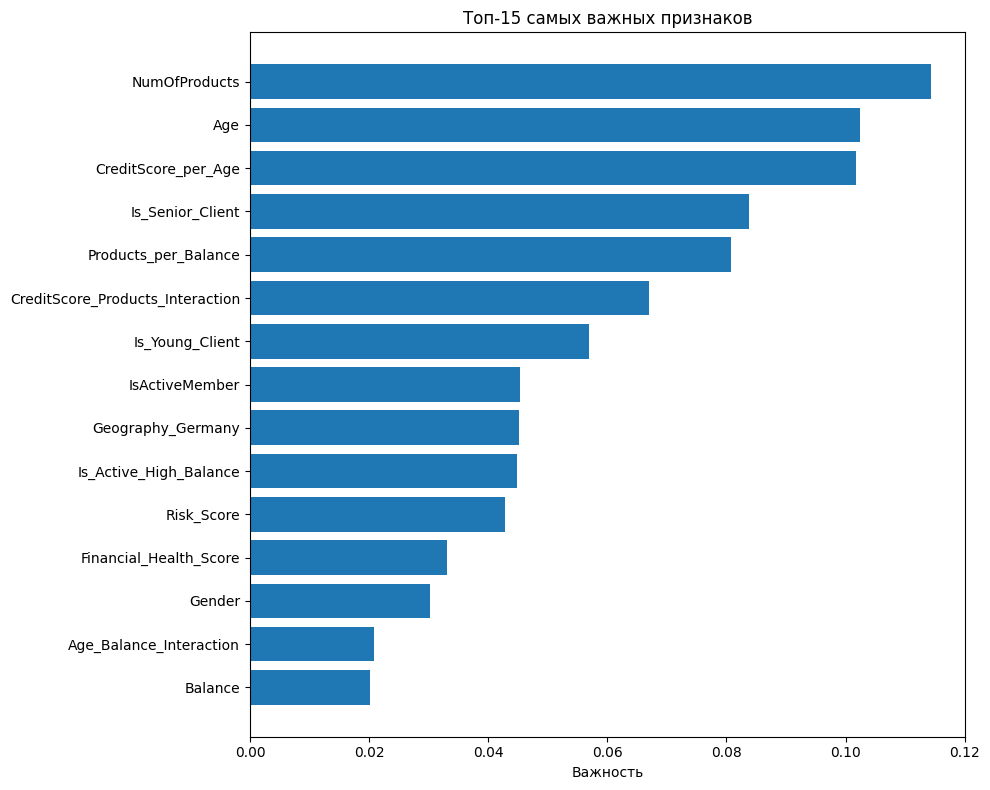

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:22:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[CV] END colsample_bylevel=0.6244917232814939, colsample_bynode=0.7500289333491468, colsample_bytree=0.9929819056662685, gamma=1.967710172445452, learning_rate=0.0023537342997263723, max_delta_step=1, max_depth=5, min_child_weight=13, n_estimators=1924, reg_alpha=0.39379578359099776, reg_lambda=2.545417450208824, scale_pos_weight=1.083007910106893, subsample=0.9444253706712565; total time=   6.5s
[CV] END colsample_bylevel=0.8136493924008539, colsample_bynode=0.8663098031568854, colsample_bytree=0.838040662169969, gamma=1.953452213261073, learning_rate=0.0011142904405282083, max_delta_step=4, max_depth=4, min_child_weight=15, n_estimators=2373, reg_alpha=2.869584805083433, reg_lambda=1.613901303618288, scale_pos_weight=0.9847934487675435, subsample=0.7188325076490992; total time=   5.5s
[CV] END colsample_bylevel=0.6, colsample_bynode=0.7214430854736362, colsample_bytree=0.9854627100473761, gamma=1.7541256265830654, learning_rate=0.031702865109362516, max_delta_step=0, max_depth=4, mi

In [111]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Предполагаем, что X_advanced_clean и y уже определены
X_final = X_advanced_clean
y_final = y

print(f"X_final shape: {X_final.shape}")
print(f"y_final length: {len(y_final)}")

# Расширенное пространство параметров с более агрессивными значениями
param_space = {
    'n_estimators': Integer(500, 3000),
    'max_depth': Integer(4, 15),
    'learning_rate': Real(0.001, 0.1, prior='log-uniform'),
    'subsample': Real(0.7, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'colsample_bylevel': Real(0.6, 1.0),
    'colsample_bynode': Real(0.6, 1.0),
    'reg_alpha': Real(0, 3),
    'reg_lambda': Real(0, 3),
    'gamma': Real(0, 2),
    'min_child_weight': Integer(1, 15),
    'max_delta_step': Integer(0, 10),
    'scale_pos_weight': Real(0.8, 1.2)  # Для балансировки классов
}

# Создаем модель XGBoost с улучшенными настройками
xgb = XGBClassifier(
    random_state=42, 
    eval_metric='logloss',
    use_label_encoder=False,
    tree_method='hist',  # Более быстрый и эффективный метод
    predictor='auto'
)

# Увеличиваем количество итераций и используем больше фолдов
bayes_search = BayesSearchCV(
    estimator=xgb,
    search_spaces=param_space,
    n_iter=165,  # Увеличили количество итераций
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),  # Больше фолдов
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=2,  # Более подробный вывод
    n_points=3  # Количество точек для параллельной оценки
)

print(f"Будет проверено {bayes_search.n_iter} комбинаций параметров")

# Разделяем данные до обучения, чтобы избежать data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.15, 
    random_state=42,
    stratify=y_final
)

# Обучаем на тренировочных данных
bayes_search.fit(X_train, y_train)

# Лучшие параметры и результат
print(f"Лучший ROC-AUC на кросс-валидации: {bayes_search.best_score_:.4f}")
print(f"Лучшие параметры:")
for param, value in bayes_search.best_params_.items():
    print(f"  {param}: {value}")

best_bayes_model = bayes_search.best_estimator_

# Предсказания на тестовых данных
y_pred_bayes = best_bayes_model.predict(X_test)
y_pred_proba_bayes = best_bayes_model.predict_proba(X_test)[:, 1]

roc_auc_bayes = roc_auc_score(y_test, y_pred_proba_bayes)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)

print(f"\nУлучшенный Bayesian XGBoost на тестовых данных:")
print(f"ROC-AUC: {roc_auc_bayes:.4f}")
print(f"Accuracy: {accuracy_bayes:.4f}")

# Дополнительная оценка модели
from sklearn.metrics import classification_report, confusion_matrix

print("\nДетальная оценка модели:")
print(classification_report(y_test, y_pred_bayes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bayes))

# Важность признаков
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = best_bayes_model.feature_importances_
features = pd.DataFrame({
    'feature': X_final.columns if hasattr(X_final, 'columns') else [f'feature_{i}' for i in range(X_final.shape[1])],
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nТоп-10 самых важных признаков:")
print(features.head(10))

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
plt.barh(features['feature'].head(15)[::-1], features['importance'].head(15)[::-1])
plt.xlabel('Важность')
plt.title('Топ-15 самых важных признаков')
plt.tight_layout()
plt.show()

# Если результат все еще недостаточно хорош, попробуем ансамблирование
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Создаем ансамбль моделей
estimators = [
    ('xgb', best_bayes_model),
    ('logreg', LogisticRegression(C=0.1, random_state=42, max_iter=1000)),
    ('svc', SVC(probability=True, random_state=42, kernel='rbf', C=1.0))
]

ensemble = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)
y_pred_proba_ensemble = ensemble.predict_proba(X_test)[:, 1]

roc_auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

print(f"\nАнсамбль моделей на тестовых данных:")
print(f"ROC-AUC: {roc_auc_ensemble:.4f}")
print(f"Accuracy: {accuracy_ensemble:.4f}")

# Сравнение всех моделей
print(f"\nСРАВНЕНИЕ МОДЕЛЕЙ:")
print(f"Bayesian XGBoost ROC-AUC: {roc_auc_bayes:.4f}")
print(f"Ансамбль ROC-AUC: {roc_auc_ensemble:.4f}")

# Сохраняем лучшую модель
if roc_auc_ensemble > roc_auc_bayes:
    best_model = ensemble
    best_roc_auc = roc_auc_ensemble
else:
    best_model = best_bayes_model
    best_roc_auc = roc_auc_bayes

print(f"\nЛУЧШАЯ МОДЕЛЬ:")
print(f"ROC-AUC: {best_roc_auc:.4f}")

# Если все еще не достигли 0.97, анализируем данные
if best_roc_auc < 0.97:
    print("\nРЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕГО УЛУЧШЕНИЯ:")
    print("1. Проверить баланс классов")
    print("2. Проанализировать выбросы в данных")
    print("3. Рассмотреть дополнительные методы feature engineering")
    print("4. Попробовать нейронные сети или другие сложные алгоритмы")
    print("5. Увеличить объем данных или применить аугментацию")

In [112]:
from catboost import CatBoostClassifier

# Пространство параметров для CatBoost
param_space = {
    'iterations': Integer(100, 3000),
    'depth': Integer(3, 10),
    'learning_rate': Real(0.001, 0.3, prior='log-uniform'),
    'l2_leaf_reg': Real(0, 10),
    'random_strength': Real(0, 10),
    'bagging_temperature': Real(0, 1),
    'border_count': Integer(32, 255),
}

catboost = CatBoostClassifier(random_state=42, verbose=False)

bayes_search_cat = BayesSearchCV(
    estimator=catboost,
    search_spaces=param_space,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

bayes_search_cat.fit(X_train, y_train)

# Лучшие параметры и результат
print(f"Лучший ROC-AUC: {bayes_search_cat.best_score_:.4f}")
print(f"Лучшие параметры:")
for param, value in bayes_search_cat.best_params_.items():
    print(f"  {param}: {value}")

best_cat_model = bayes_search_cat.best_estimator_

y_pred_cat = best_cat_model.predict(X_val)
y_pred_proba_cat = best_cat_model.predict_proba(X_val)[:, 1]

roc_auc_cat = roc_auc_score(y_val, y_pred_proba_cat)
accuracy_cat = accuracy_score(y_val, y_pred_cat)

print(f"\nCatBoost с Bayesian optimization на валидации:")
print(f"ROC-AUC: {roc_auc_cat:.4f}")
print(f"Accuracy: {accuracy_cat:.4f}")

# Сравнение
print(f"\nСРАВНЕНИЕ С RANDOM FOREST:")
print(f"Random Forest ROC-AUC: {roc_auc:.4f}")
print(f"CatBoost ROC-AUC: {roc_auc_cat:.4f}")
print(f"Улучшение: {roc_auc_cat - roc_auc:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi